In [20]:
# Importation des bibliothèques nécessaires au travail
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sn

In [21]:
# Afficher les résultats en entier afin de bien évaluer le Data Set
pd.set_option("display.max_row", 111)

# Afficher toutes les colonnes de notre Data Set pour évaluer son étendu
pd.set_option("display.max_column", 111)

In [22]:
# chargement ou lecture du Dataset
data = pd.read_excel("dataset.xlsx")

In [23]:
# Apperçu des 1ères lignes du dataset
data.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                      NaN            NaN   
1                                -0.625073      -0.140648   
2                                      NaN            NaN   
3                                      NaN            NaN   
4                                      NaN            NaN   

  Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
0             NaN                    

# 1. Exploratory Data Analysis

## Objectif :
- Comprendre du mieux possible nos données (un petit pas en avant vaut mieux qu'un grand pas en arrière)
- Développer une première stratégie de modélisation

## Checklist de base
### Analyse de Forme :
- **Variable target** : SARS-Cov-2 exam result
- **Lignes et colonnes** : 5644, 111
- **Types de variables** : qualitatives 70 et quantitatives 41
- **Analyse des variables manquantes** : 
    - beaucoup de NaN (moitié des variables > 90% de NaN)
    - 2 groupes de données 76% => Test viral, 89% => taux sanguins

### Analyse de Fond:
- **Visualisation de la target** :
    - 10% de positifs
- **Signification des variables** :
    - variables continues standardisées, skewed (asymétriques), test sanguin
    - age quantille : il est dificile d'interpreter ce graphique, en effet, ces données ont été traitées donc je ne sais pas de quel genre de transformations mathématiques elles ont fait l'object. On ne saura pas davantage car, celui qui a uploadé ce Data Set ne l'a pas du tout precisé dessus.
    - variables qualitatives : binaires (0, 1), virales, le Rhinovirus qui semble très élévé.
- **Relation Variables / Target** :
    - target / blood : les taux de Monocytes, Leukocytes et Platelets semblent liés au COVID-19 => Hypothèse à tester
    - target / age : les individus de faible et moyen age sont très peu contaminés ? Ou les individus de fort age sont les plus contaminés ? Tout cela on ne sait pas encore car, les enfants sont contaminés autant que les adultes et malheureusement le Data Set ne nous en dit pas davantage. En revanche, cette variable pourra être très intéressante pour la comparaison des résultats de test sanguin
    - tareget / Viral : il est très rare d'avoir de doubles maladies. Rhinovirus / Enterovirus positif - COVID-19 négatif ? Hypothèse à tester car il faut prendre les données de plusieurs régions. Mais toutefois il est possible que la région subie une épidemie de ce virus. Et il est tout à fait possible d'avoir 2 Virus à la fois, tout cela n'a rien avoir avec le COVID-19
    
### Les Conclusions Initiales:
- Il y a asseez de données manquantes (il sera mieux de garder 20% de Dataset)
- Nous avons 2 groupes de données intéressantes (Viral et Sanguin)
- Il est difficile de prédire si un individu est atteint du Covid-19 ou pas en se basant sur des simples tests sanguins, en effet, nous n'avons pas presque pas de variable 'discrimante' pour distinguer les cas positifs/négatifs. Ce n'est pas grave, nous allons continuer notre analyse et voir ce que l'on pourra en tirer, "La Chine ne se développe pas en une journée, alors le Machine Learning ne peut pas transformer de l'eau en vin comme fit Jésus-Christ. Tout bon Data Scientist va jusqu'au boutv😣 de sa mission même si c'est très compliqué 😀
- On a quand-même quelque chose de très intéressant : on a pu identifier les variables intéressantes qui peuvent jouer un rôle important (Monocytes, Leukocytes, Platelets...)


### Analyse plus détaillée
- **Relation Variables / Variables :**
    - **blood_data / blood_data** : quelques variables sont très corrélées avec +0.9 de coéfficient de corrélation (à surveiller dans l'avenir) 
    - **blood_data / age**: On observe une très faible corrélation entre age et taux sanguins
    - **viral / viral** : Influenza rapid test donne de mauvais résultats, on vera s'il faudra peut-être l'abandonner car, il a même été reconnu en étant peu fiable
    - **relation maladie / blood_data** : Les taux sanguins entre malade et Covid-19 sont différents. ATTENTION => Hypothèse à vérifier
    - **relation hospitalisation / est malade** :
    - **relation hospitalisation / blood_data** : Cette analyse est très intéressant dans le cas où on voudrait insérer les patients dans un bon service en fonction deur résultats sanguins



- ***NaN Analyse***:
    - Viral : 1350(92/8)
    - Blood: 600(87/13)
    - Les deux : 90


### Hypotheses nulle (H0)

- **Les personnes atteintes de Covid-19 ont des taux de Monocytes, Leukocytes, Platelets significativement différents**
    - H0 : Les taux moyens ne sont pas EGAUX chez les individus positifs et négatifs
- **Les personnes atteintes d'une quelconque maladie ont des taux significativement différents**

### Analyse de forme des données

In [24]:
# Avant toute chose, il faut faire une copy de notre Dataset
df = data.copy()

In [25]:
# Identifier le nombre de lignes et de colonnes
df.shape

(5644, 111)

<AxesSubplot:ylabel='None'>

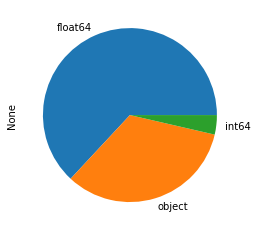

In [26]:
# Afficher les types de variables : qualitatifs et quantitatifs
df.dtypes.value_counts().plot.pie()

In [27]:
# Vérification des valeurs qui ne sont des nombres afin des nombres
df.isna()

Patient ID  Patient age quantile  SARS-Cov-2 exam result  \
0          False                 False                   False   
1          False                 False                   False   
2          False                 False                   False   
3          False                 False                   False   
4          False                 False                   False   
...          ...                   ...                     ...   
5639       False                 False                   False   
5640       False                 False                   False   
5641       False                 False                   False   
5642       False                 False                   False   
5643       False                 False                   False   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                              False   
1                                              False   
2                                              False   
3                                              False   
4                                              False   
...                                              ...   
5639                                           False   
5640                                           False   
5641                                           False   
5642                                           False   
5643                                           False   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                 False       
1                                                 False       
2                                                 False       
3                                                 False       
4                                                 False       
...                                                 ...       
5639                                              False       
5640                                              False       
5641                                              False       
5642                                              False       
5643                                              False       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                 False            True   
1                                                 False           False   
2                                                 False            True   
3                                                 False            True   
4                                                 False            True   
...                                                 ...             ...   
5639                                              False            True   
5640                                              False            True   
5641                                              False            True   
5642                                              False            True   
5643                                              False           False   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
0           True       True                   True             True   
1          False      False                  False            False   
2           True       True                   True             True   
3           True       True                   True             True   
4           True       True                   True             True   
...          ...        ...                    ...              ...   
5639        True       True                   True             True   
5640        True       True                   True             True   
5641        True       True                   True             True   
5642        True       True                   True             True   
5643       False      False                  False            False   

      Lymphocytes  Mean corpu

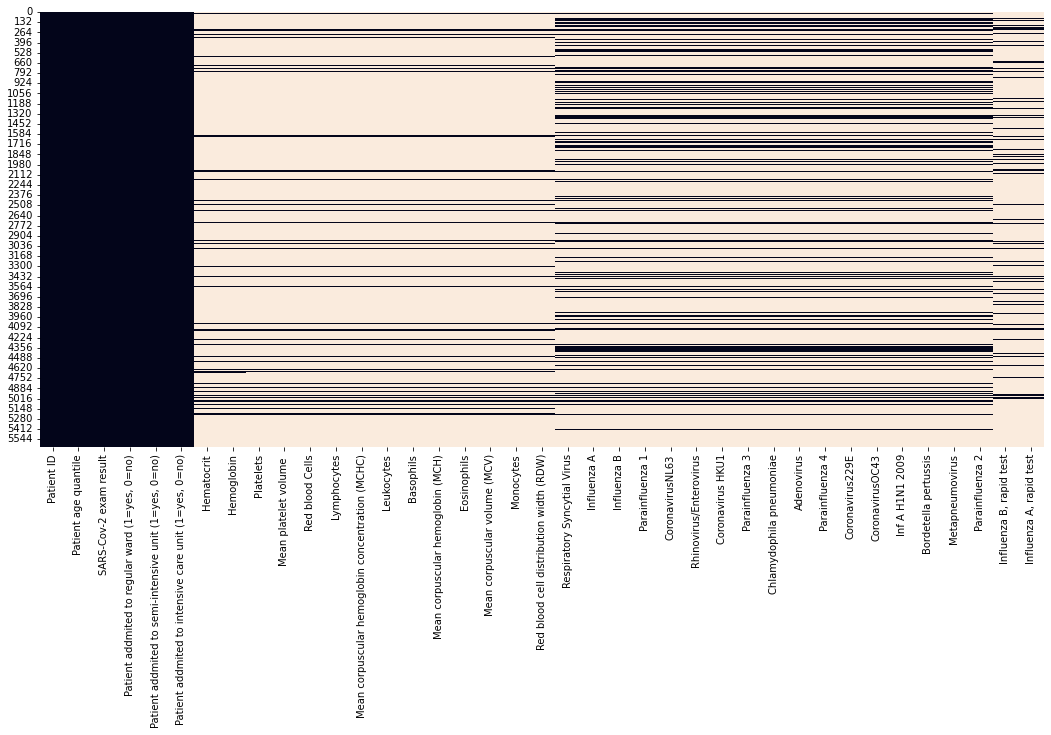

In [34]:
# Analyse de valeurs manquantes du Data Set
# Pour ça il est toujours mieux d'afficher tous les éléments de notre Data Set et cela dans une image
# Affichage dans une figure de taille moyenne
plt.figure(figsize=(18, 8))
# Eliminer la barre de coloration 
sn.heatmap(df.isna(), cbar=False)
# Afficher le graphique
plt.show()

In [35]:
# Afficher le pourcentage de toutes les valeurs manquantes
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Influenza B                                              0.760099
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Metapneumovirus                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydophila pneumoniae                                 0.760454
Parainflue

## Analyse du Fond


### 1. Visualisation initiale - Elimination des colonnes inutiles

In [36]:
# Eliminer toutes les colonnes à plus de 90% de données manquantes
df = df[df.columns[df.isna().sum()/df.shape[0] < 0.9]]

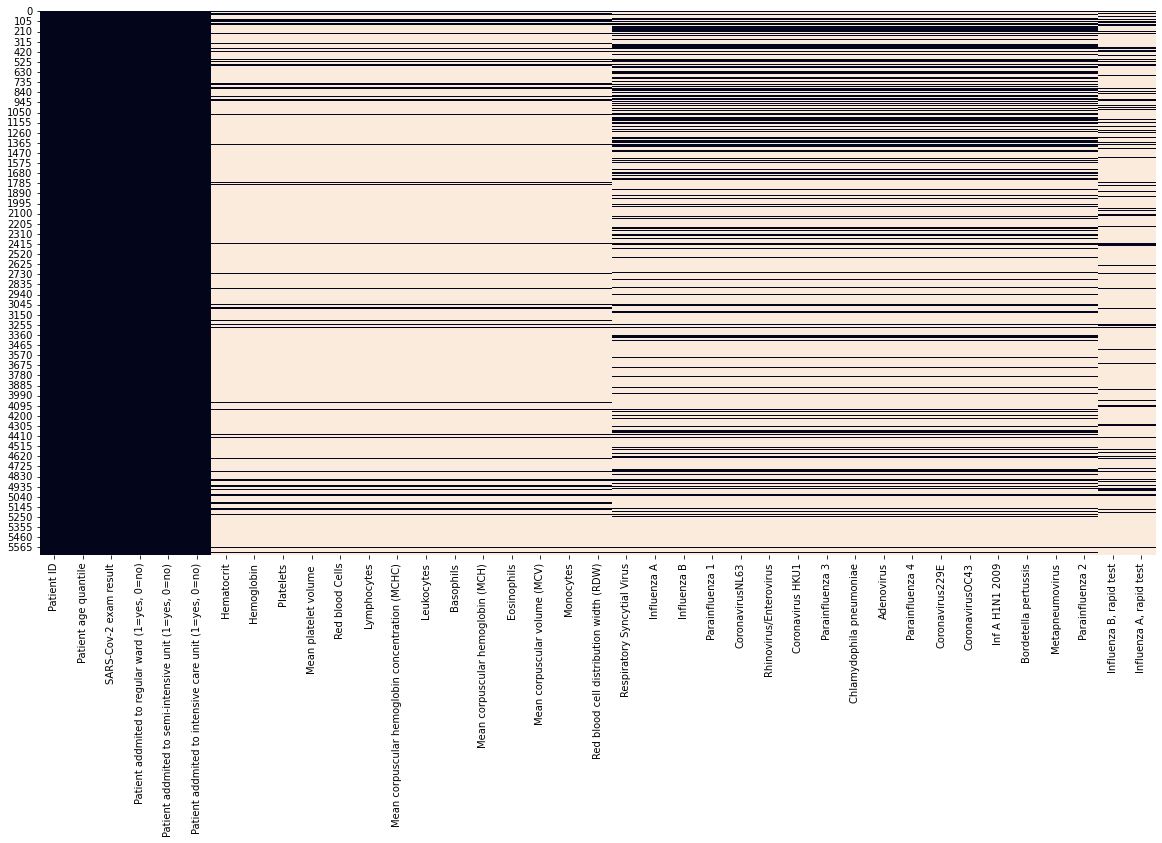

In [37]:
# Reafficher le nouveau Data Set en image avec seaborn contenant toutes las variables manquantes
# Création de la figure
plt.figure(figsize=(20, 10))
sn.heatmap(df.isna(), cbar=False)
plt.show()

In [38]:
# Eliminer la colonne "Patient ID" car elle ne nous servira à rien dans nos analyses
df = df.drop("Patient ID", axis=1)

In [39]:
# Afficher les dix 1eres lignes du Data Set
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

### Examiner la colonne target

In [44]:
# Visualisation de la target
df["SARS-Cov-2 exam result"]

0       negative
1       negative
2       negative
3       negative
4       negative
          ...   
5639    positive
5640    negative
5641    negative
5642    negative
5643    positive
Name: SARS-Cov-2 exam result, Length: 5644, dtype: object

In [47]:
# Compter le nombre de cas positif et négatif 
df["SARS-Cov-2 exam result"].value_counts(normalize=True)

negative    0.901134
positive    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

### Signification des variables Qantitatives (Continues)

<Figure size 432x288 with 0 Axes>

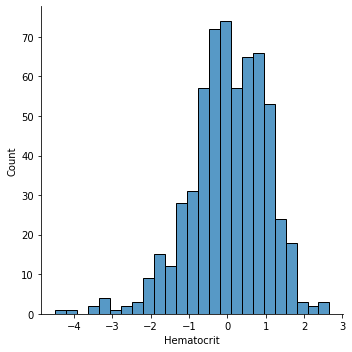

<Figure size 432x288 with 0 Axes>

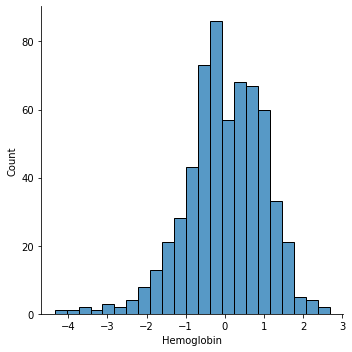

<Figure size 432x288 with 0 Axes>

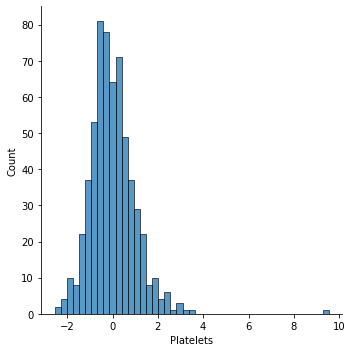

<Figure size 432x288 with 0 Axes>

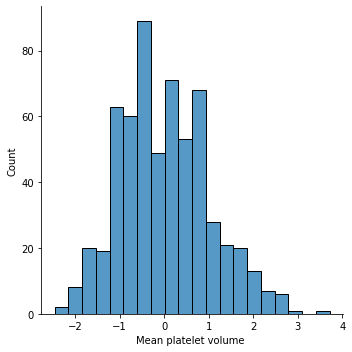

<Figure size 432x288 with 0 Axes>

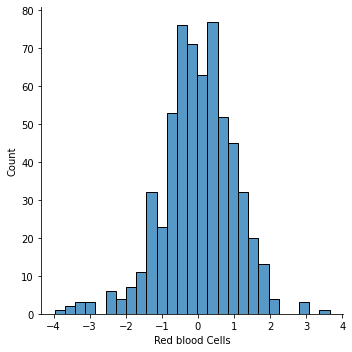

<Figure size 432x288 with 0 Axes>

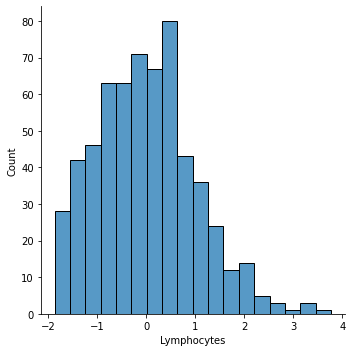

<Figure size 432x288 with 0 Axes>

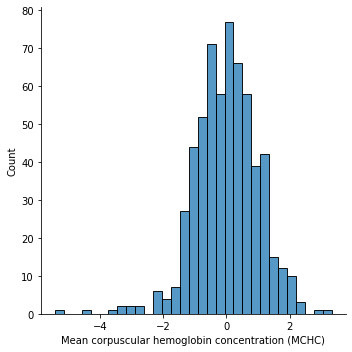

<Figure size 432x288 with 0 Axes>

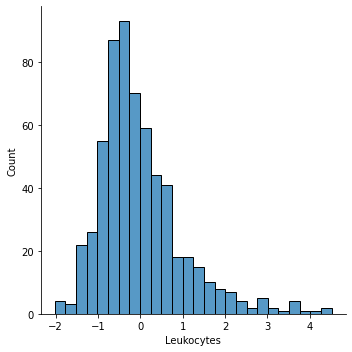

<Figure size 432x288 with 0 Axes>

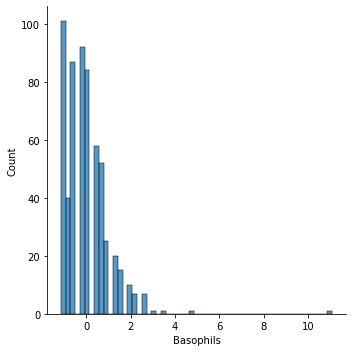

<Figure size 432x288 with 0 Axes>

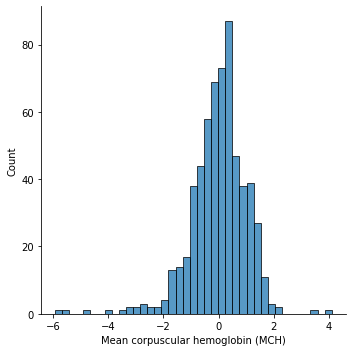

<Figure size 432x288 with 0 Axes>

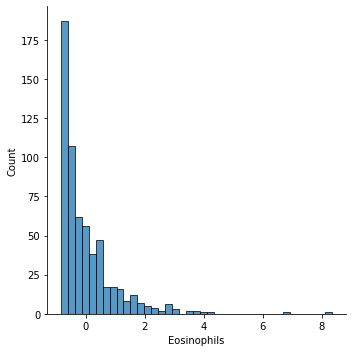

<Figure size 432x288 with 0 Axes>

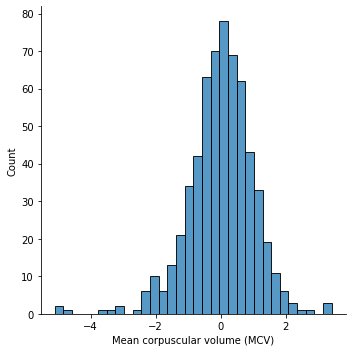

<Figure size 432x288 with 0 Axes>

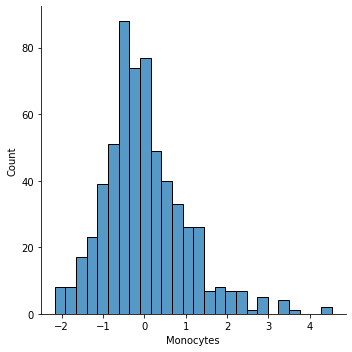

<Figure size 432x288 with 0 Axes>

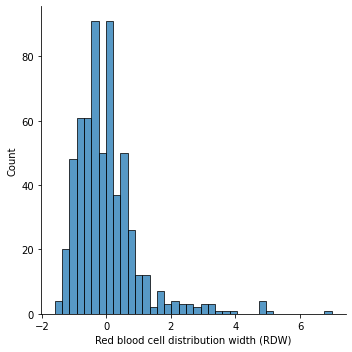

In [55]:
# Tracer les histogramme des variables continues

# Sélection de chaque donnée continue
for col in df.select_dtypes("float"):
    
    # créatoon de la figure
    plt.figure()
    
    # affichage de chaque variable continue
    sn.displot(df[col])
    plt.show()

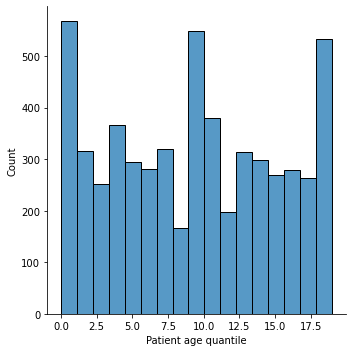

In [59]:
# Travailler sur la colonne âge
sn.displot(df["Patient age quantile"])
plt.show()

In [62]:
df["Patient age quantile"].value_counts()#.plot.pie()
#plt.figlegend()
#plt.show()

11    380
4     366
9     359
0     334
7     319
2     315
13    313
14    299
5     294
6     281
16    279
19    275
15    269
17    263
18    259
3     251
1     234
12    197
10    190
8     167
Name: Patient age quantile, dtype: int64

### Variables Qualitatives (Catégorielles)

In [197]:
# Vérification de chaque catégorie dans la variable target
# La fonction unique() de numpy est aussi disponible pour pandas
df["SARS-Cov-2 exam result"].unique()

array(['negative', 'positive'], dtype=object)

In [198]:
# Histogramme des variables catégorielles
# Sélection de chaque donnée continue
for col in df.select_dtypes("object"):
    
    # afficher le nom de colonne
    print(f"{col :-<50} {df[col].unique()}")

SARS-Cov-2 exam result---------------------------- ['negative' 'positive']
Respiratory Syncytial Virus----------------------- [nan 'not_detected' 'detected']
Influenza A--------------------------------------- [nan 'not_detected' 'detected']
Influenza B--------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1----------------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63----------------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus---------------------------- [nan 'detected' 'not_detected']
Coronavirus HKU1---------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 3----------------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae-------------------------- [nan 'not_detected' 'detected']
Adenovirus---------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 4----------------------------------- [nan 'not_detected' 'detected']
Coronavirus2

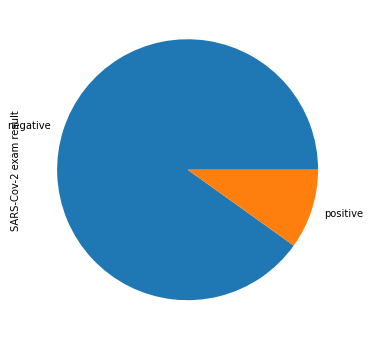

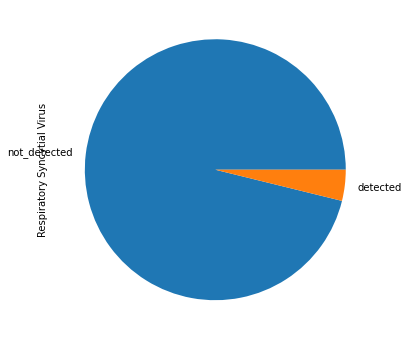

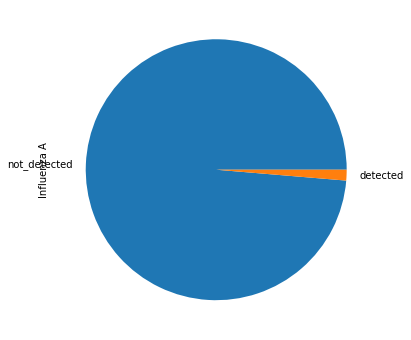

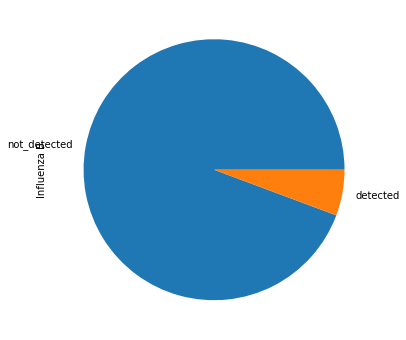

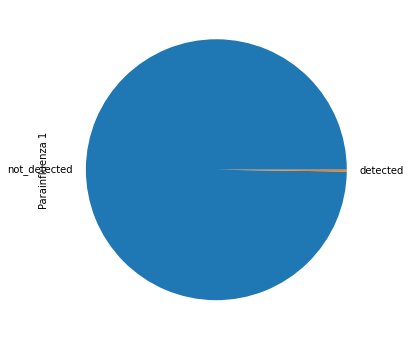

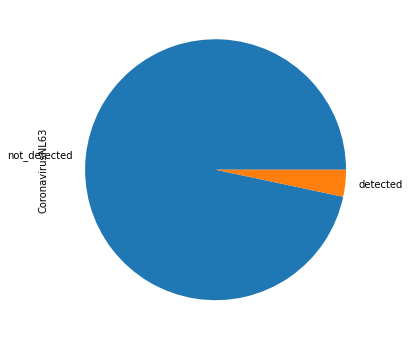

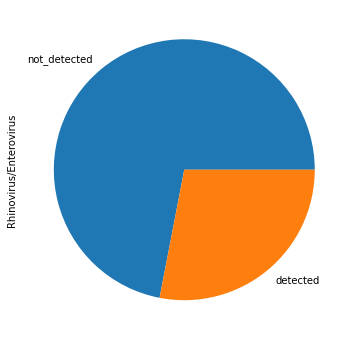

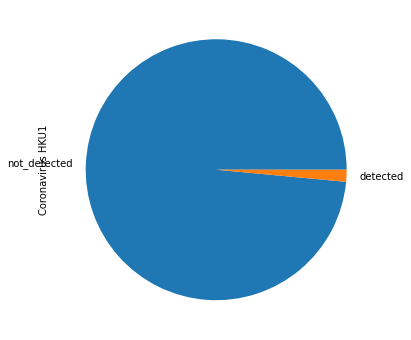

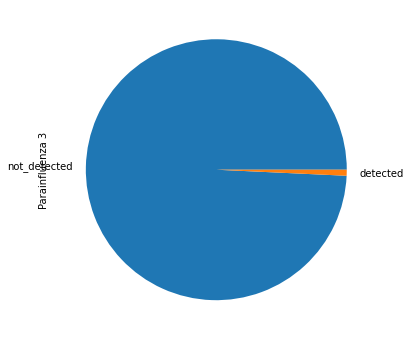

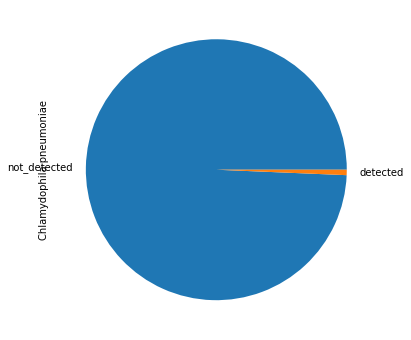

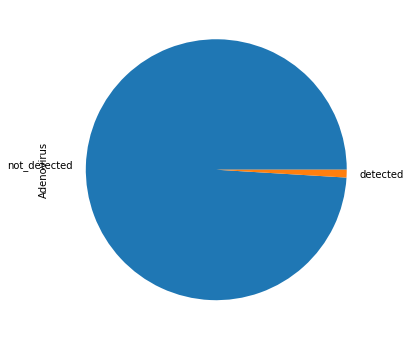

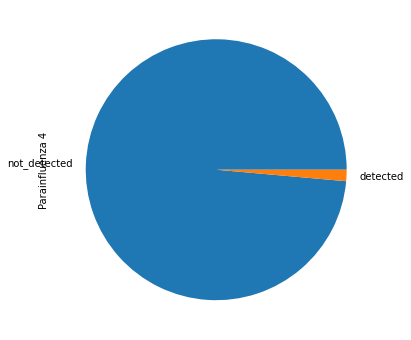

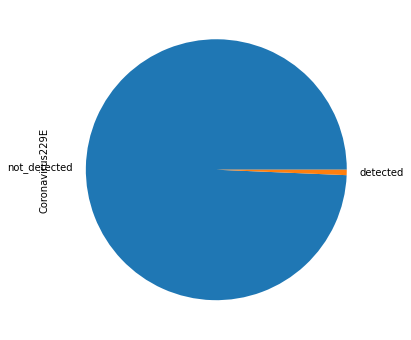

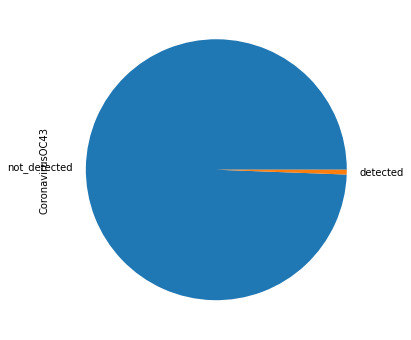

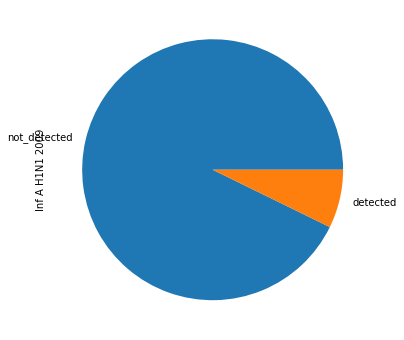

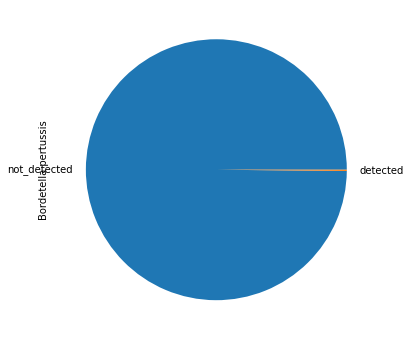

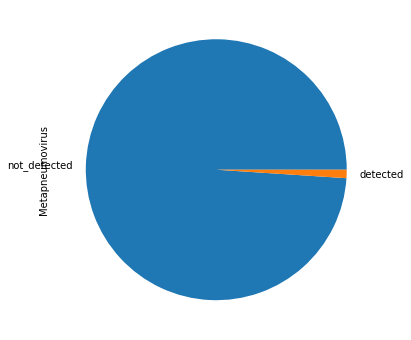

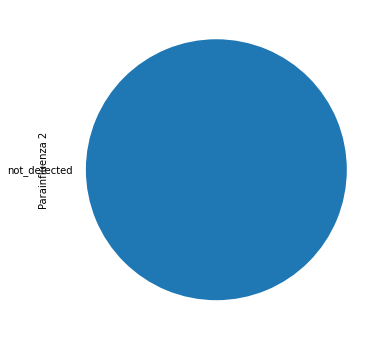

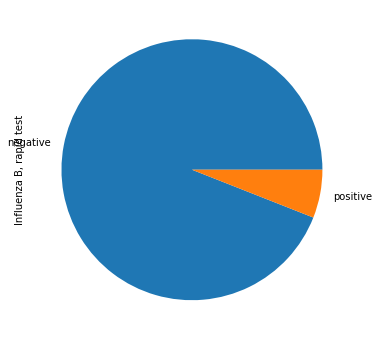

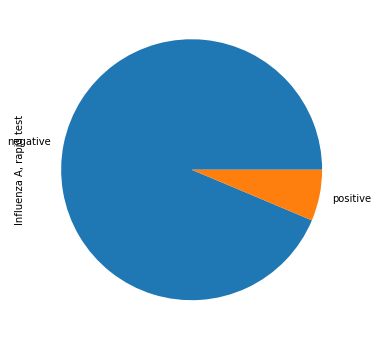

In [64]:
# Compter le nombre de valeurs qu'il y a dans chaque catégorie
for col in df.select_dtypes("object"):
    
    plt.figure(figsize=(12,6))
    #compter les valeurs dans chaque variables et les afficher dans un graphique
    df[col].value_counts().plot.pie()

## Relation Target / Variables

###  Création de sous-ensembles positifs et négatifs

In [65]:
# Création du sous ensemble positif
positive_df = df[df["SARS-Cov-2 exam result"] == "positive"]

# Création du sous ensemble négatif
negative_df = df[df["SARS-Cov-2 exam result"] == "negative"]

## Création des ensembles Blood et Viral

In [66]:
# Toutes les valeurs manquantes dans une seule et unique variable
missing_rate = df.isna().sum()/df.shape[0]

In [67]:
# Ensemble Blood de 89% de valeurs manquantes
blood_columns = df.columns[(missing_rate < 0.9) & (missing_rate > 0.88)]

In [89]:
# Compter chaque occurence de la variable "blood"
blood_columns.value_counts()

Hemoglobin                                          1
Mean corpuscular hemoglobin (MCH)                   1
Eosinophils                                         1
Mean platelet volume                                1
Hematocrit                                          1
Mean corpuscular volume (MCV)                       1
Mean corpuscular hemoglobin concentration (MCHC)    1
Leukocytes                                          1
Platelets                                           1
Lymphocytes                                         1
Monocytes                                           1
Red blood Cells                                     1
Red blood cell distribution width (RDW)             1
Basophils                                           1
dtype: int64

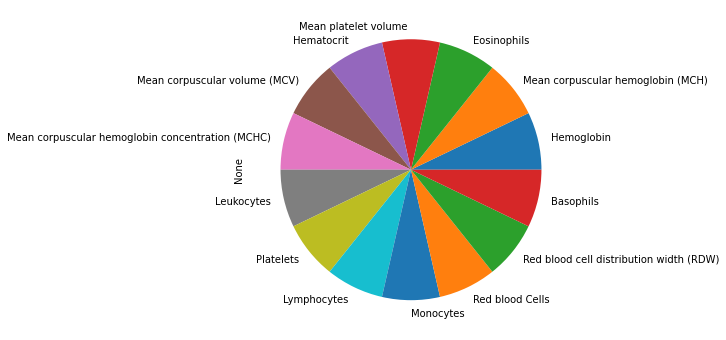

In [85]:
# Afficher toutes les colonnes de blood dans un graphique pour une meilleure compréhension
plt.figure(figsize=(8, 6))
blood_columns.value_counts().plot.pie()
plt.show()

In [68]:
# Ensemble Viral de 76% de valeurs manquantes
viral_columns = df.columns[(missing_rate < 0.88) & (missing_rate > 0.75)]

In [88]:
viral_columns.value_counts()

Rhinovirus/Enterovirus         1
Coronavirus HKU1               1
Coronavirus229E                1
Influenza A, rapid test        1
Inf A H1N1 2009                1
Influenza A                    1
CoronavirusNL63                1
CoronavirusOC43                1
Respiratory Syncytial Virus    1
Parainfluenza 2                1
Parainfluenza 4                1
Metapneumovirus                1
Chlamydophila pneumoniae       1
Influenza B, rapid test        1
Parainfluenza 1                1
Adenovirus                     1
Bordetella pertussis           1
Parainfluenza 3                1
Influenza B                    1
dtype: int64

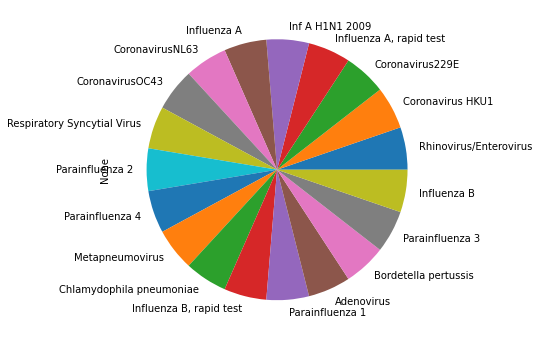

In [86]:
# Toutes les colonnes de la variable viral dont les valeurs manquantes sont de 76%
plt.figure(figsize=(8, 6))
viral_columns.value_counts().plot.pie()
plt.show()

### *En conclusion, les colonnes des deux variables, viral et blood ont le même nbre d'occurences =1*

### Relation Target / Blood

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


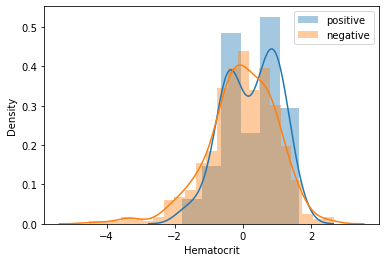

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


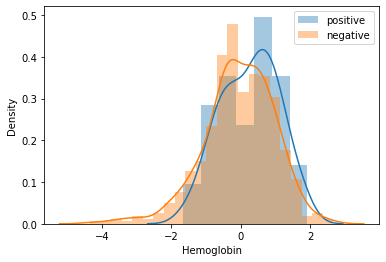

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


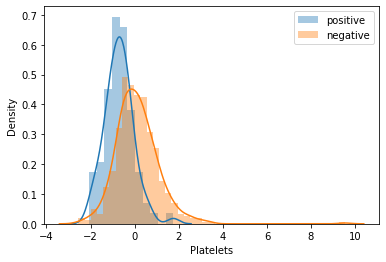

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


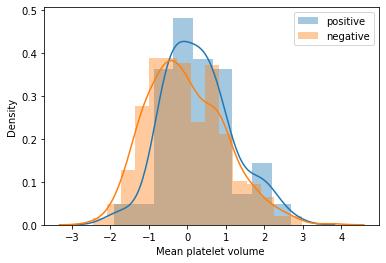

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


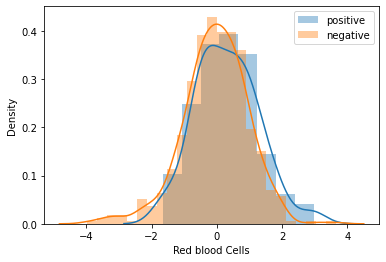

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


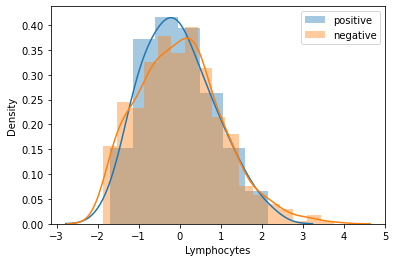

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


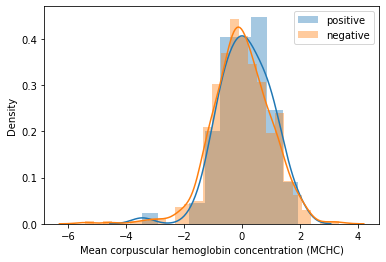

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


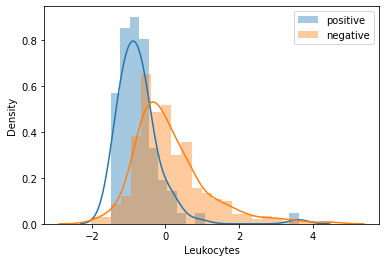

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


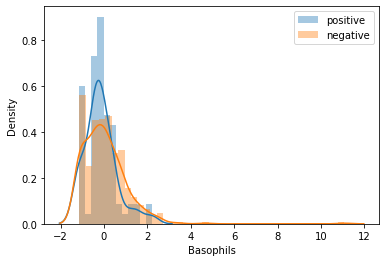

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


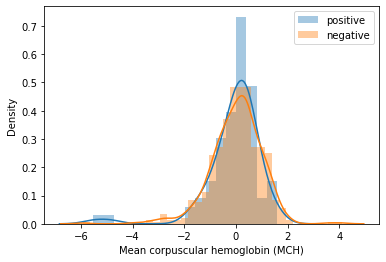

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


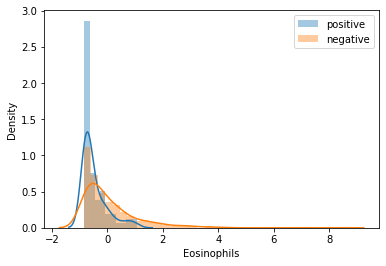

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


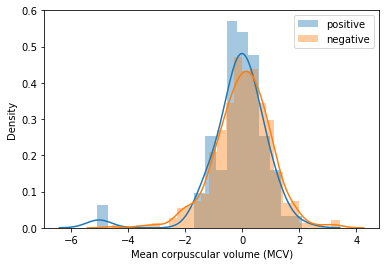

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


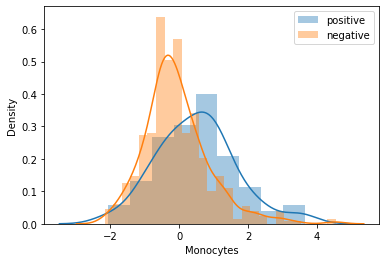

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


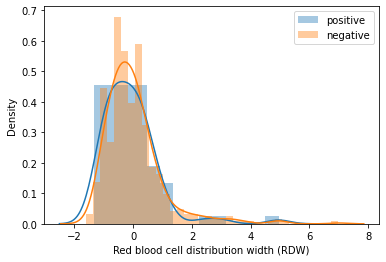

In [94]:
# Visualiser la relation entre le taux sanguin et la variable cible
for col in blood_columns:
    
    # création de la figure contenant toutes les affichages
    plt.figure()
    # Les colonnes positives
    sn.distplot(positive_df[col], label = "positive")
    # Les colonnes négatives
    sn.distplot(negative_df[col], label = "negative")
    plt.legend()
    plt.show()
    
# La fonction distplot() ne sera plus disponibles dans les versions à venir
# pour se faire il faut utiliser la fonction displot() ou histplot()

### Relation Target / age

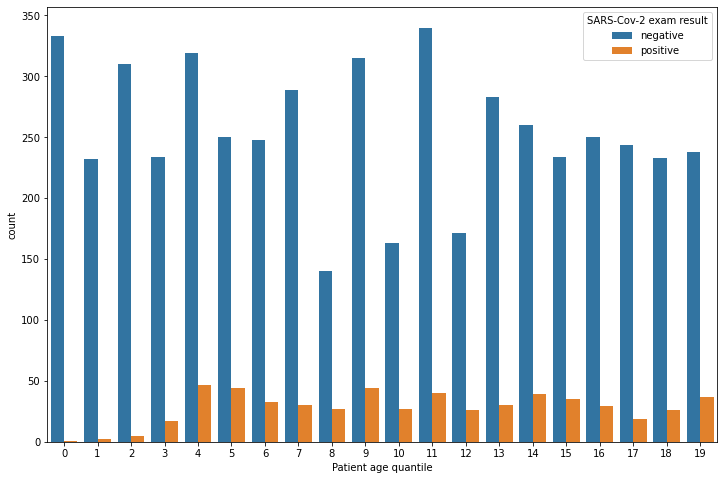

In [96]:
# On peut réutiliser le code précedent, mais il y a une autre fonction de seaborn très utile à exploiter
# Création d'une figure servant de visualisation
plt.figure(figsize=(12, 8))
sn.countplot(x="Patient age quantile", hue="SARS-Cov-2 exam result", data=df)
plt.show()

## Relation Target / Viral (Variables Qualitatives)

In [97]:
# Etant donné que la target comme les test viraux sont des catégories alors;
# On va utiliser une fonctioon crosstab() de Pandas
pd.crosstab(df["SARS-Cov-2 exam result"], df["Influenza A"])

Influenza A             detected  not_detected
SARS-Cov-2 exam result                        
negative                      18          1224
positive                       0           112

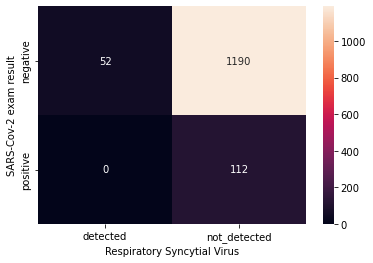

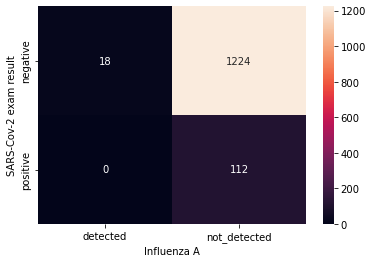

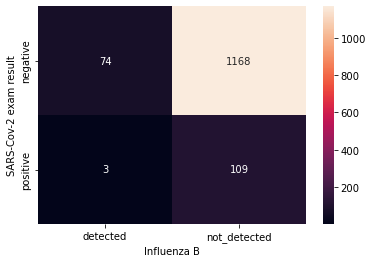

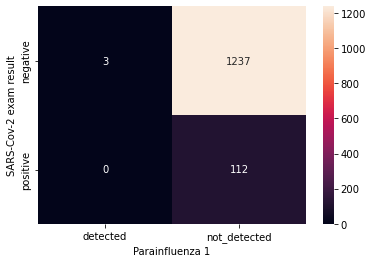

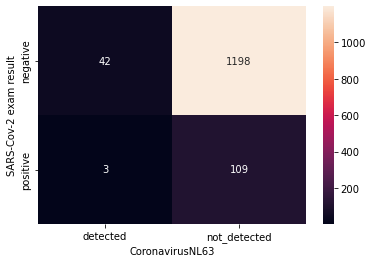

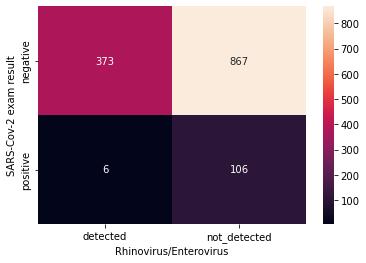

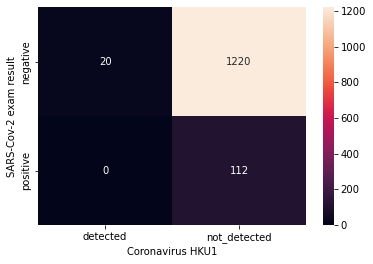

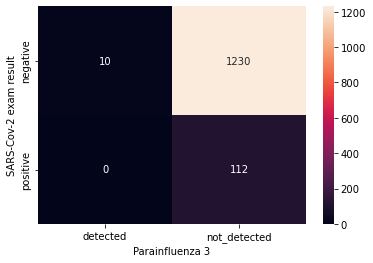

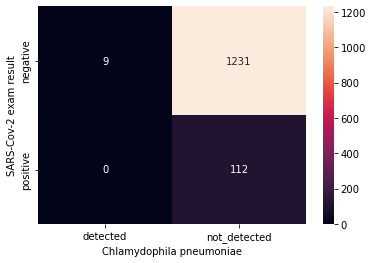

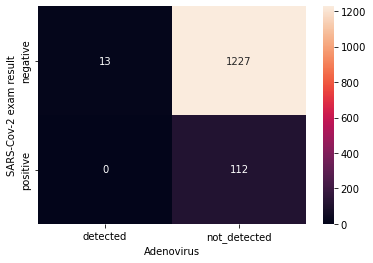

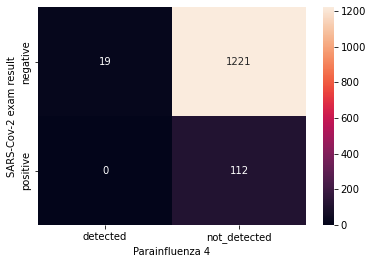

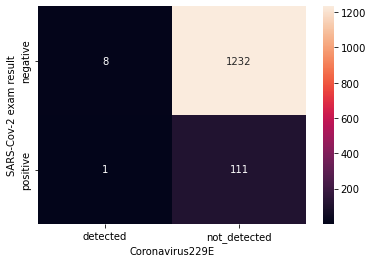

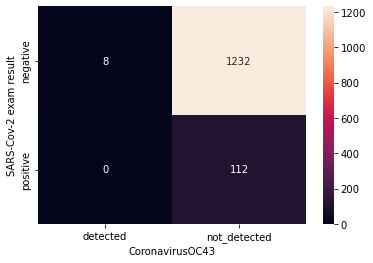

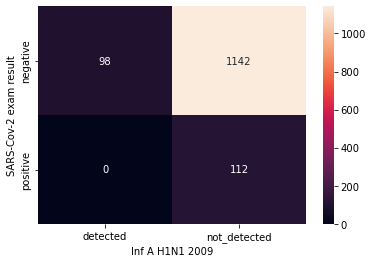

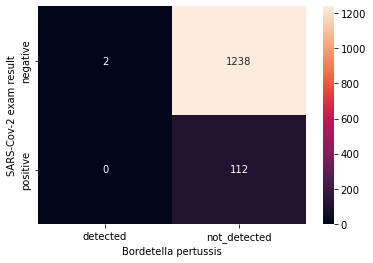

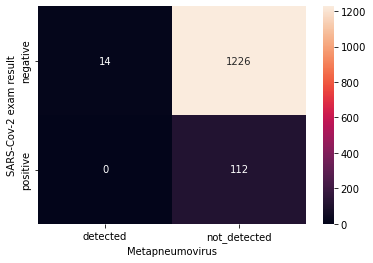

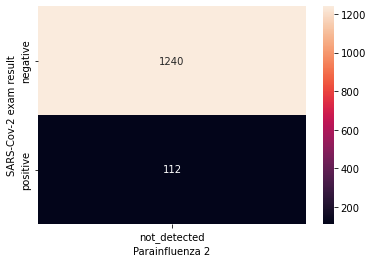

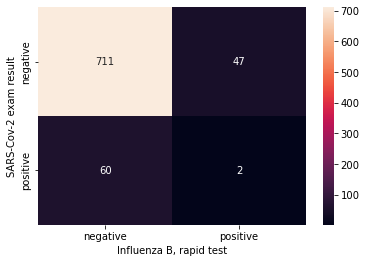

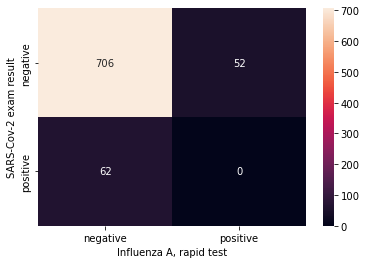

In [99]:
# Automatisation de l'analyse précedente
# Affichage de tous les nombres dans le graphique et les afficher en entiers
for col in viral_columns:
    
    # Afficher toute cette analyse dans une seule figure
    plt.figure()
    sn.heatmap(pd.crosstab(df["SARS-Cov-2 exam result"], df[col]), annot=True, fmt="d")

## Analyse un peu plus Avancée
### Relation Variables / Variables
#### Relations de taux sanguins

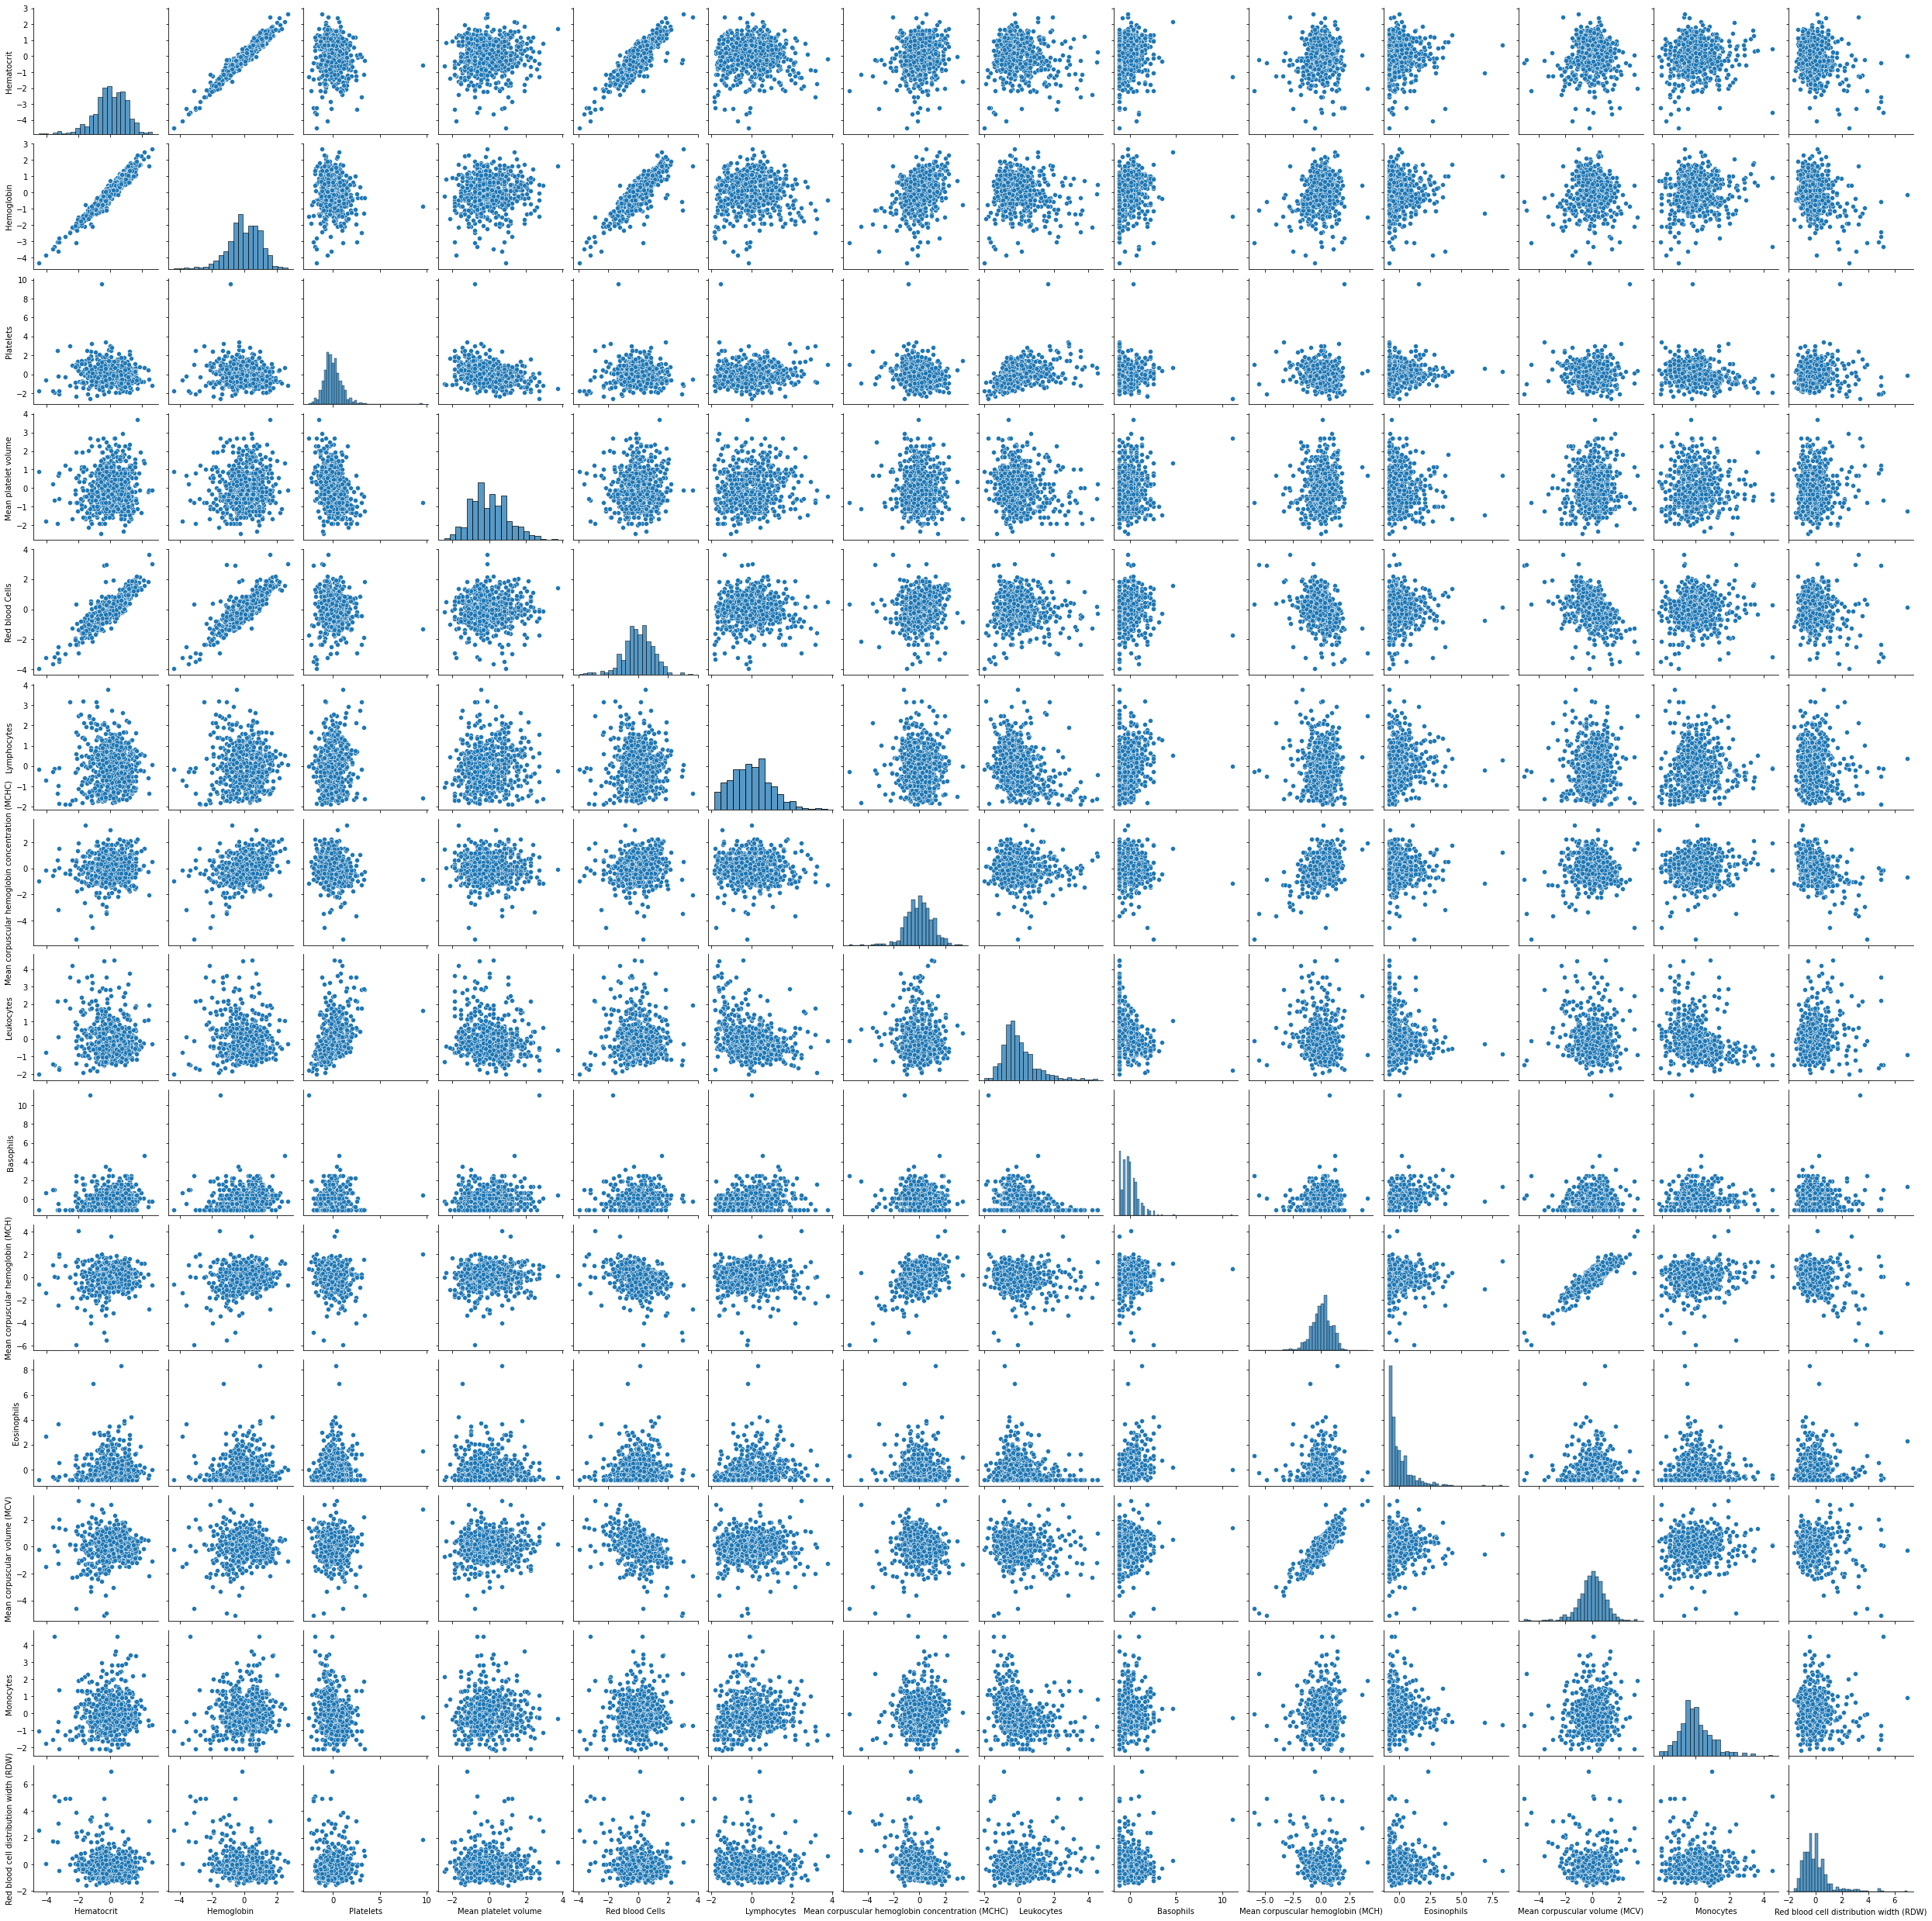

In [102]:
# La focntion pairplot() est très intéressante et il faut souvent faire recours 
# à cette dernière vers la fin après avoir filtré le Dataset
sn.pairplot(df[blood_columns])
plt.show()

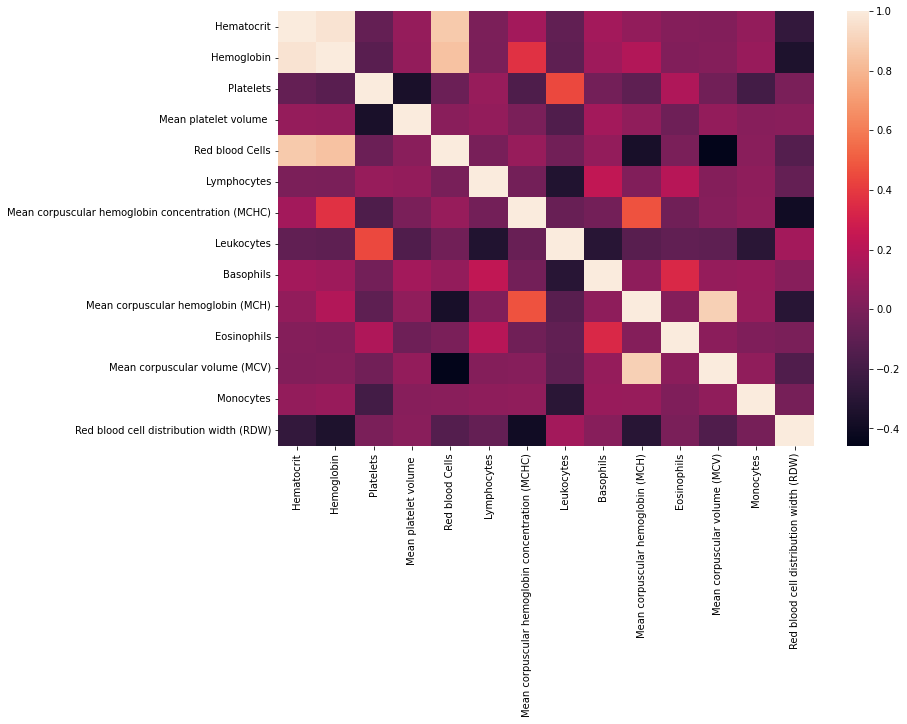

In [103]:
# La façon la plus rapide de voir le graphique ci-dessus est de procéder de manière à utiliser
# la corrélation avec la fonction heatmap() de seaborn
plt.figure(figsize=(12, 8))
sn.heatmap(df[blood_columns].corr())
plt.show()
# A ce stade on est pas entrain de prendre des decision mais collecter la data pour prendre les décisions

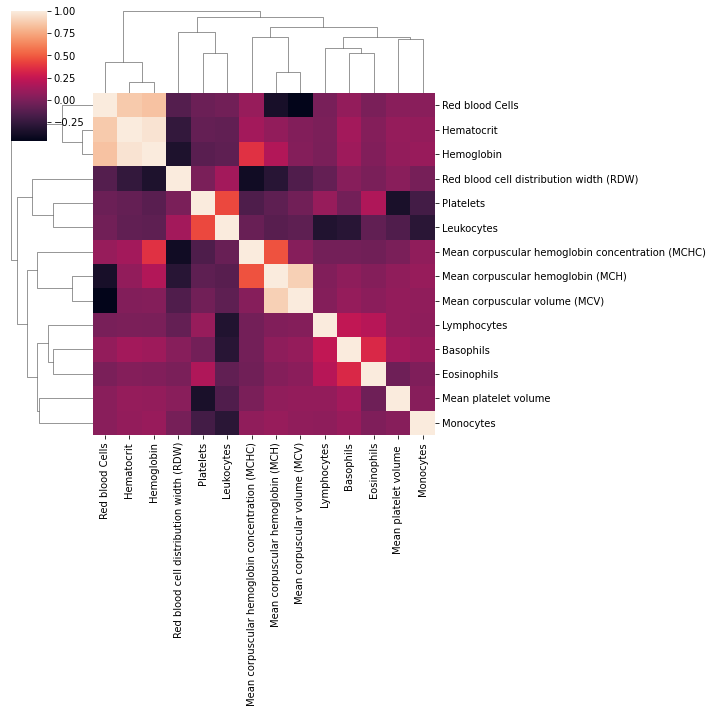

In [108]:
# On peut tout de même utiliser clustermap() pour plus de détails en affichant des clusters
sn.clustermap(df[blood_columns].corr())
plt.show()

### Relation Age / Sang (Blood)

<Figure size 432x288 with 0 Axes>

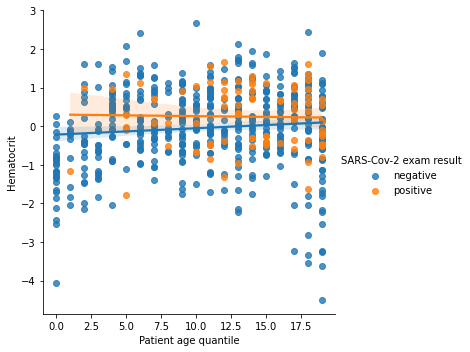

<Figure size 432x288 with 0 Axes>

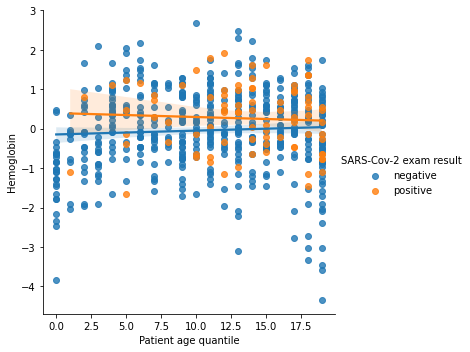

<Figure size 432x288 with 0 Axes>

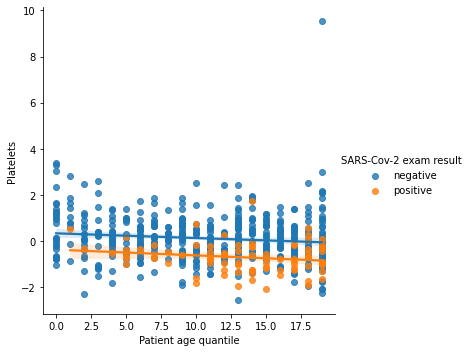

<Figure size 432x288 with 0 Axes>

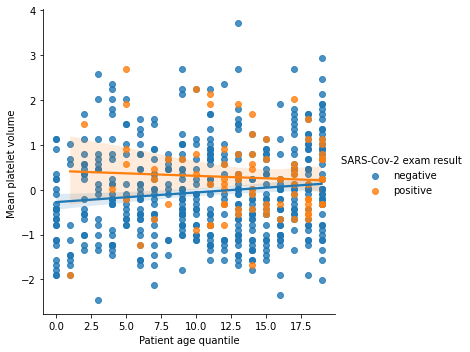

<Figure size 432x288 with 0 Axes>

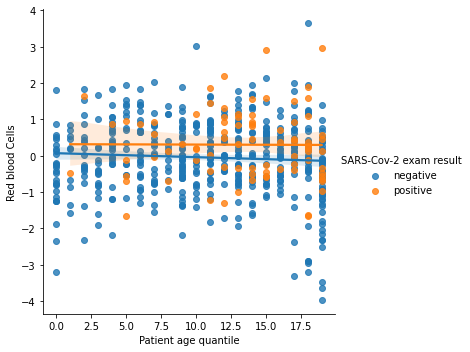

<Figure size 432x288 with 0 Axes>

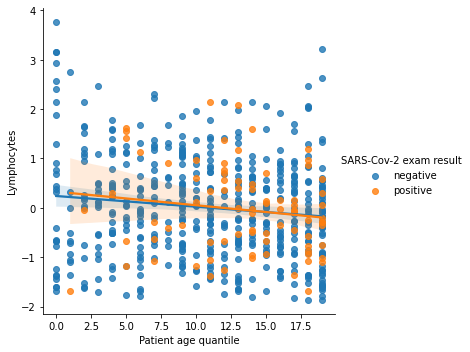

<Figure size 432x288 with 0 Axes>

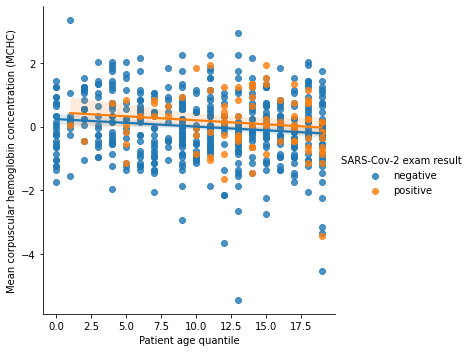

<Figure size 432x288 with 0 Axes>

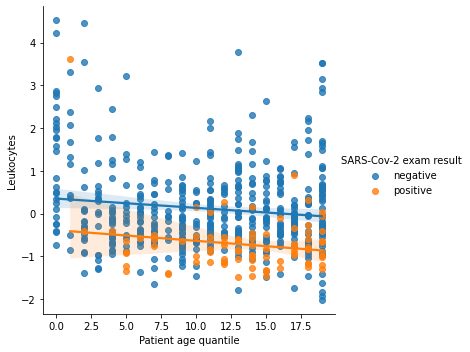

<Figure size 432x288 with 0 Axes>

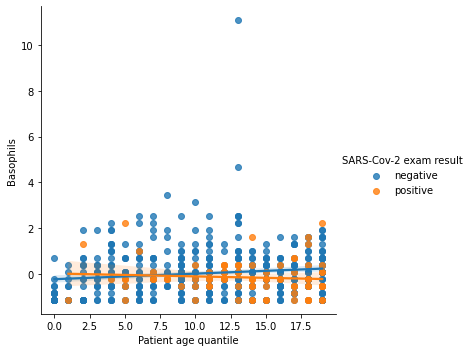

<Figure size 432x288 with 0 Axes>

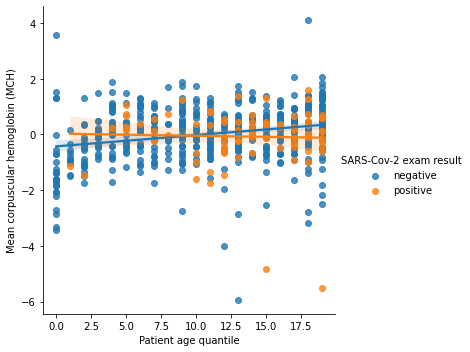

<Figure size 432x288 with 0 Axes>

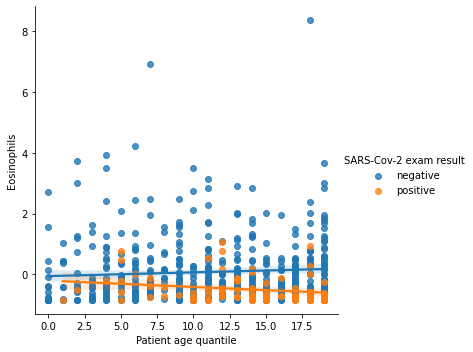

<Figure size 432x288 with 0 Axes>

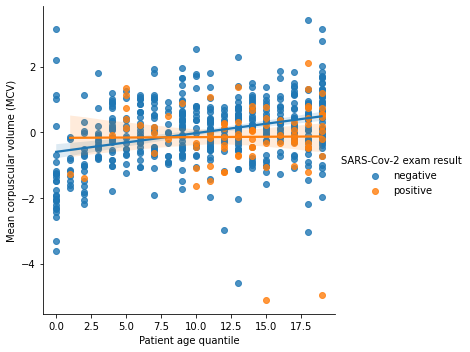

<Figure size 432x288 with 0 Axes>

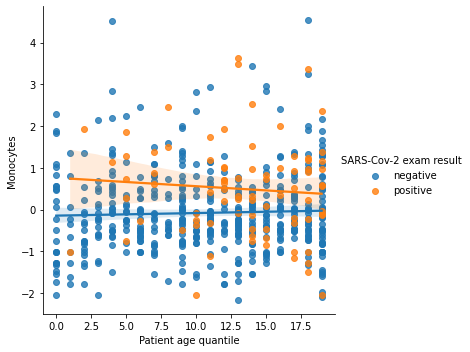

<Figure size 432x288 with 0 Axes>

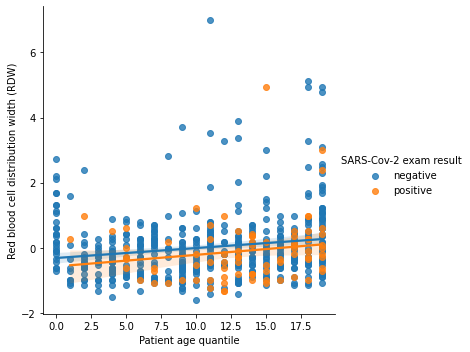

In [111]:
# On utilise la fonction lmplot() de seabonr qui nous permet de visualiser les courbes
# régressions dans nos nuages de points

for col in blood_columns:
    
    # Création de figure contenant toutes les données
    plt.figure()
    # En abscisse l'age, en ordonnée la colonne correspondant, en discrimation le résultat : "positive" ou "negative" et appliquer cela sur tout le Dataset
    sn.lmplot(x="Patient age quantile", y=col, hue="SARS-Cov-2 exam result", data=df)
    plt.show()

In [113]:
# Vérification de la relation age / taux de globules en utilisant la corrélation
df.corr()["Patient age quantile"].sort_values()
# Après analyse, la corrélation est très faible

Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Red blood Cells                                         -0.037510
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Eosinophils                                              0.022085
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Monocytes                                                0.050962
Hemoglobin                                               0.060320
Hematocrit                                               0.096808
Basophils                                                0.107525
Mean platelet volume                                     0.119449
Red blood cell distribution width (RDW)                  0.166429
Mean corpu

## Relation Viral / Viral
### Relation entre Influenza et Rapid test
Il y a déjà un influenza A et B mais pourquoi en un Influenza rapid ? On en saura davantage...

In [213]:
# Toutes variables Influenza A
pd.crosstab(df["Influenza A"], df["Influenza A, rapid test"])
# Le taux de toutes les variables "Influenza A" par rapport au "rapid test"

Influenza A, rapid test  negative  positive
Influenza A                                
detected                        2         4
not_detected                  245        15

In [114]:
# Toutes variables Influenza B
pd.crosstab(df["Influenza B"], df["Influenza B, rapid test"])
# Le taux de toutes les variables "Influenza B" par rapport au "rapid test"

Influenza B, rapid test  negative  positive
Influenza B                                
detected                       18        11
not_detected                  233         4

## Relation Viral / Sanguin
### On va devoir créer une nouvelle variable "est malade"

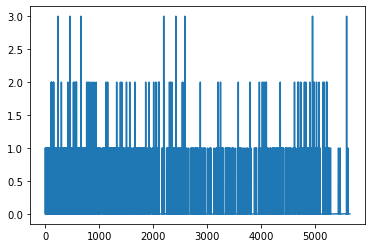

In [117]:
# On vérifie si le patient a n'importe quelle maladir listée à l'exception du Covid-19
# Dans ce cas on doit éliminer les deux dernière colonnes rapid test A et B tout en faisant la somme
# du tableau numpy sur un axe donné
plt.plot(np.sum(df[viral_columns[:-2]] == "detected", axis=1))
plt.show()

In [118]:
# Bon, on doit simplement s'intéresser à tout ce qui est supérieur à 1 et insérer le tableau dans la variable
df["est malade"] = np.sum(df[viral_columns[:-2]] == "detected", axis=1) >= 1

In [119]:
# On voit bien que notre Data Set a une nouvelle colonne "est malade" tout à la fin
df.head(10)

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   
5                     9               negative   
6                    13               negative   
7                    16               negative   
8                     1               negative   
9                    17               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   
5                                               0   
6                                               0   
7                                               0   
8                                               0   
9                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       
5                                                  0       
6                                                  0       
7                                                  0       
8                                                  1       
9                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   
5                                                  0             NaN   
6                                                  0             NaN   
7                                                  0             NaN   
8                                                  0       -1.571682   
9                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1   -0.022340  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   
5         NaN        NaN                    NaN              NaN          NaN   
6         NaN        NaN                    NaN              NaN          NaN   
7         NaN        NaN                    NaN              NaN          NaN   
8   -0.774212   1.429667              -1.672222        -0.850035    -0.005738   
9         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                         -0.950790    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   
5                                               NaN   

In [120]:
# Création de deux Datasets malade et non malade
malade_df = df[df["est malade"] == True]
non_malade_df = df[df["est malade"] == False]

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


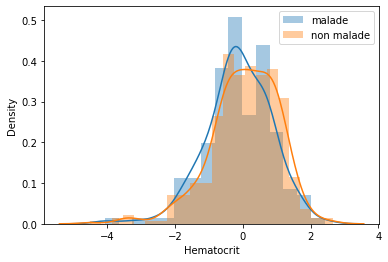

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


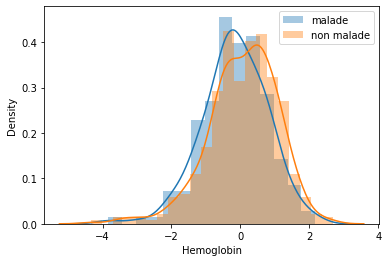

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


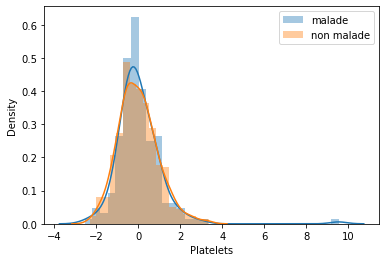

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


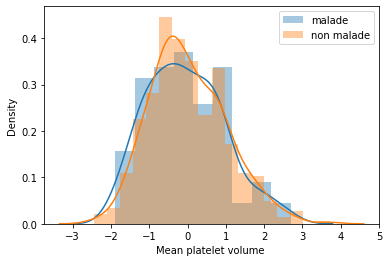

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


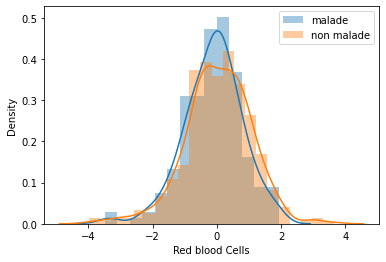

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


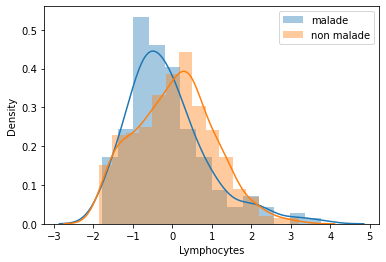

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


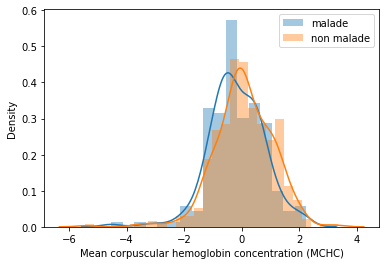

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


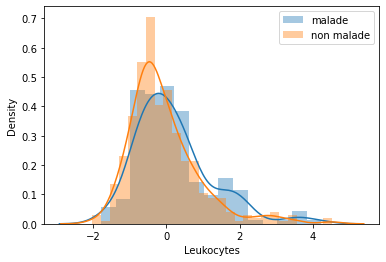

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


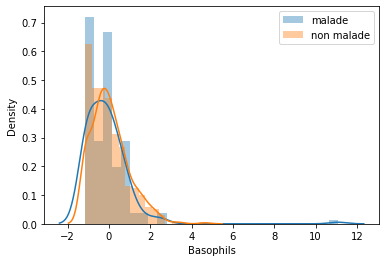

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


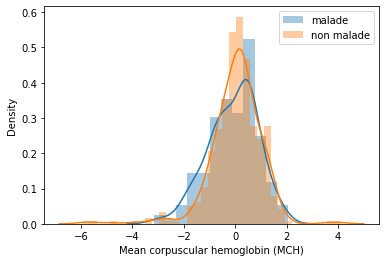

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


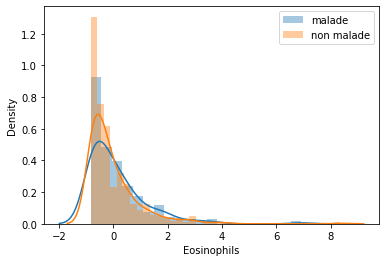

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


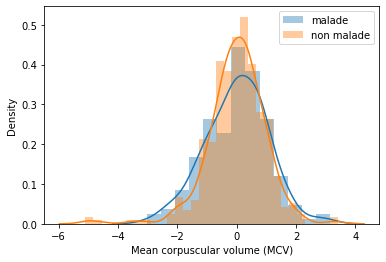

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


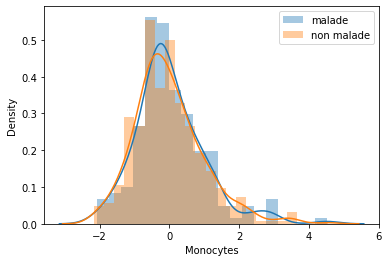

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


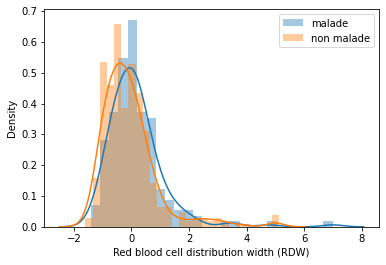

In [122]:
# Visualisation de la relation entre le taux sanguin et viral
for col in blood_columns:
    
    # création de la figure contenant toutes les affichages
    plt.figure()
    # Les colonnes positives
    sn.distplot(malade_df[col], label = "malade")
    # Les colonnes négatives
    sn.distplot(non_malade_df[col], label = "non malade")
    # Affichage de la légende de sur tous les graphiques
    plt.legend()
    plt.show()

## Relation hospitalisation / Malade

In [123]:
# Définir une fonction hospitalisation sur tout le Dataset afin de savoir de voir en temps 
# réel le taux de tous les patients en hospitalisés

def hospitalisation(df):
    
    if df["Patient addmited to regular ward (1=yes, 0=no)"] == 1:
        return "Surveillance"
    elif df["Patient addmited to semi-intensive unit (1=yes, 0=no)"] == 1:
        return "Soins semi-intensifs"
    elif df["Patient addmited to intensive care unit (1=yes, 0=no)"] == 1:
        return "Soins intensifs"
    else:
        return "Inconnu"

In [124]:
# Création d'une nouvelle colonne dans le Dataset mettant l'état de l'hospitalisation dans la variable
# en fonction des résultats que l'on a et l'appliquer sur l'axe 1 (celui des colonnes)
df["statut"] = df.apply(hospitalisation, axis=1)

In [125]:
# Afficher les 10ères colonnes du Dataset
df.head(10)

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   
5                     9               negative   
6                    13               negative   
7                    16               negative   
8                     1               negative   
9                    17               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   
5                                               0   
6                                               0   
7                                               0   
8                                               0   
9                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       
5                                                  0       
6                                                  0       
7                                                  0       
8                                                  1       
9                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   
5                                                  0             NaN   
6                                                  0             NaN   
7                                                  0             NaN   
8                                                  0       -1.571682   
9                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1   -0.022340  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   
5         NaN        NaN                    NaN              NaN          NaN   
6         NaN        NaN                    NaN              NaN          NaN   
7         NaN        NaN                    NaN              NaN          NaN   
8   -0.774212   1.429667              -1.672222        -0.850035    -0.005738   
9         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                         -0.950790    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   
5                                               NaN   

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

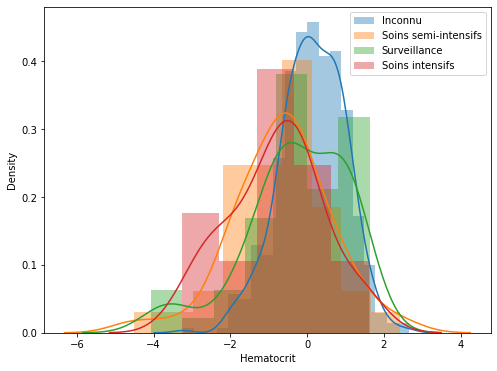

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

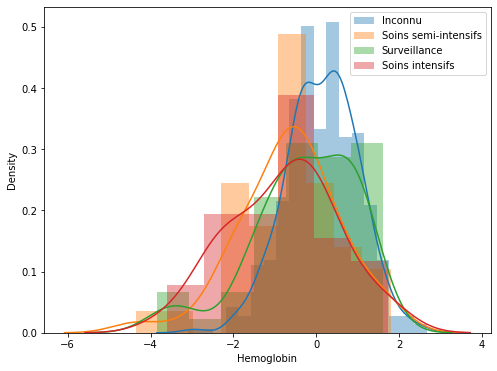

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

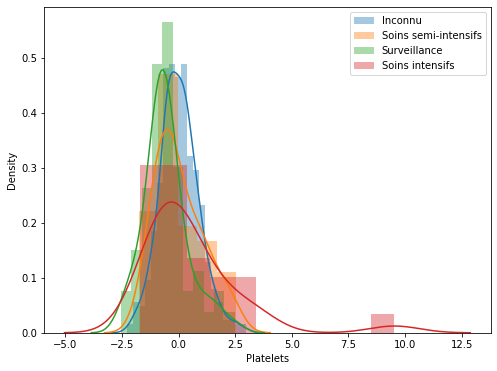

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

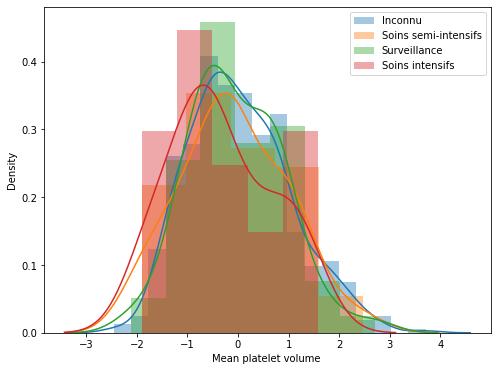

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

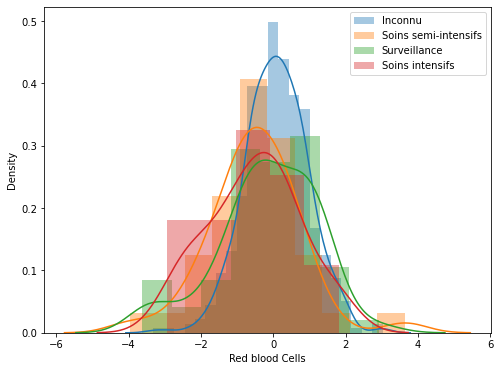

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

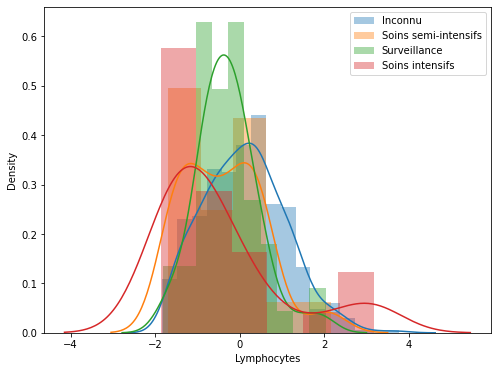

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

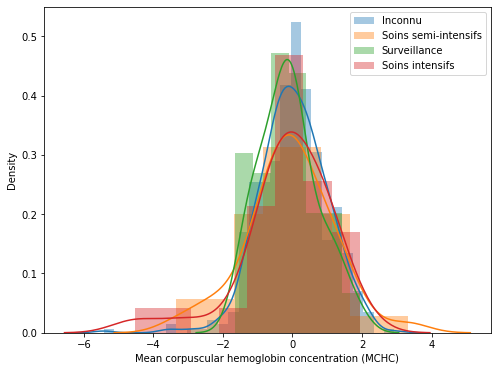

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

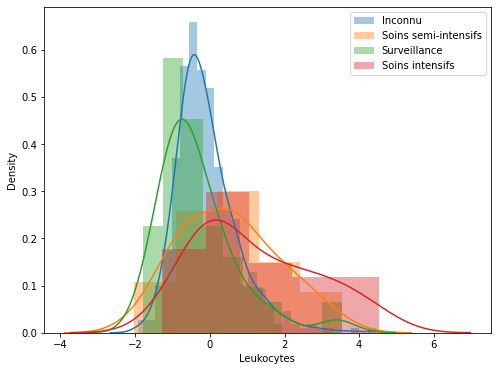

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

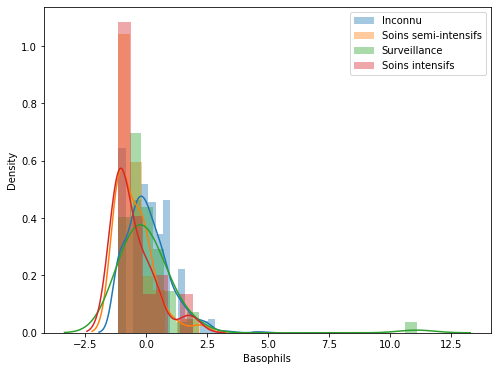

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

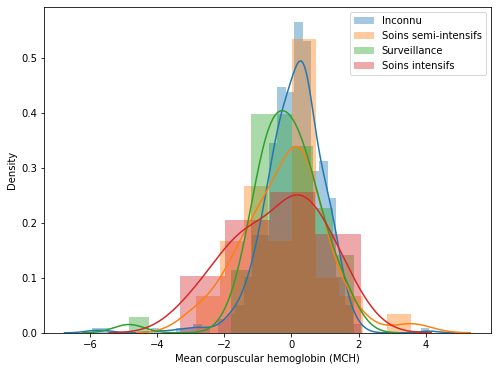

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

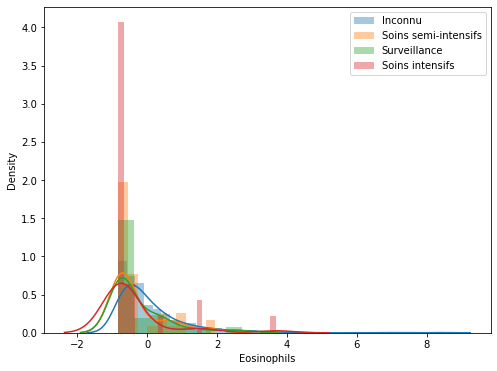

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

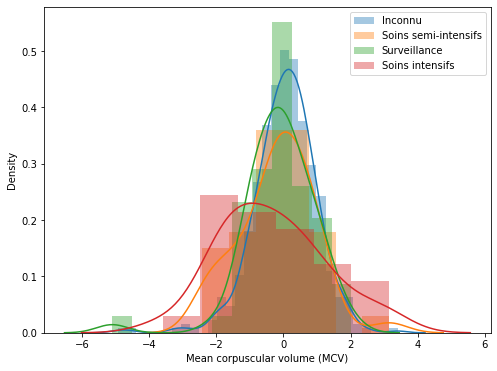

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

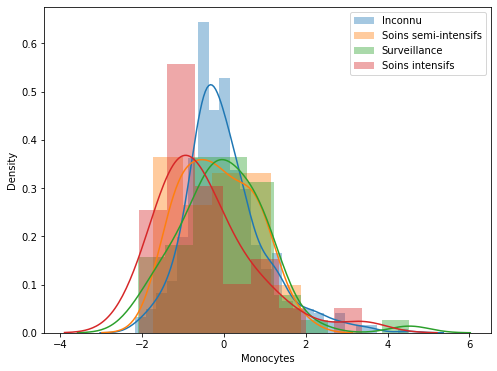

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

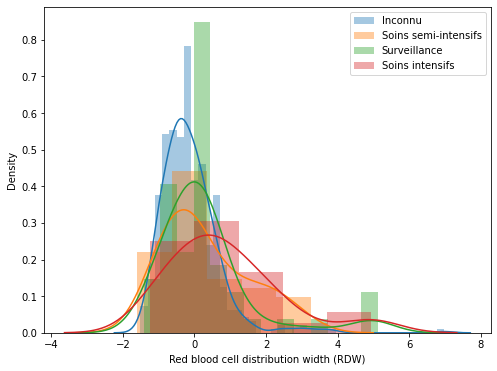

In [130]:
# Affichage des taux sanguins des différents individus admisent dans différents groupes d'hospitalisation

for col in blood_columns:
    
    
    # Figure contenant tous les éléments 
    plt.figure(figsize=(8, 6))
    # Dans cette figure on rajoute chaque fois différents plots itérés sur différentes
    # catégories de statut en utilisant la fonction unique()
    for cat in df["statut"].unique():
        # filtrer le statut égal cat et ensuite injecter ce filtre dans le tableau
        # just en sélectionnant la colonne concernée
        sn.distplot(df[df["statut"] == cat][col], label = cat)
    # La légende de chaque graphique en focntion de sa dimension donnée dans la figure
    plt.legend()
    plt.show()

## NaN (Not a Number) Analyse
#### Que se passe t-il si l'on procedait à l'élimination de certaines valeurs manquantes encore une fois de plus ?
#### Actuellement nous avons deux types de variables : 
- ***blood_columns***
- ***viral_columns***

In [133]:
blood_columns

Index(['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)'],
      dtype='object')

In [134]:
viral_columns

Index(['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'Influenza B, rapid test',
       'Influenza A, rapid test'],
      dtype='object')

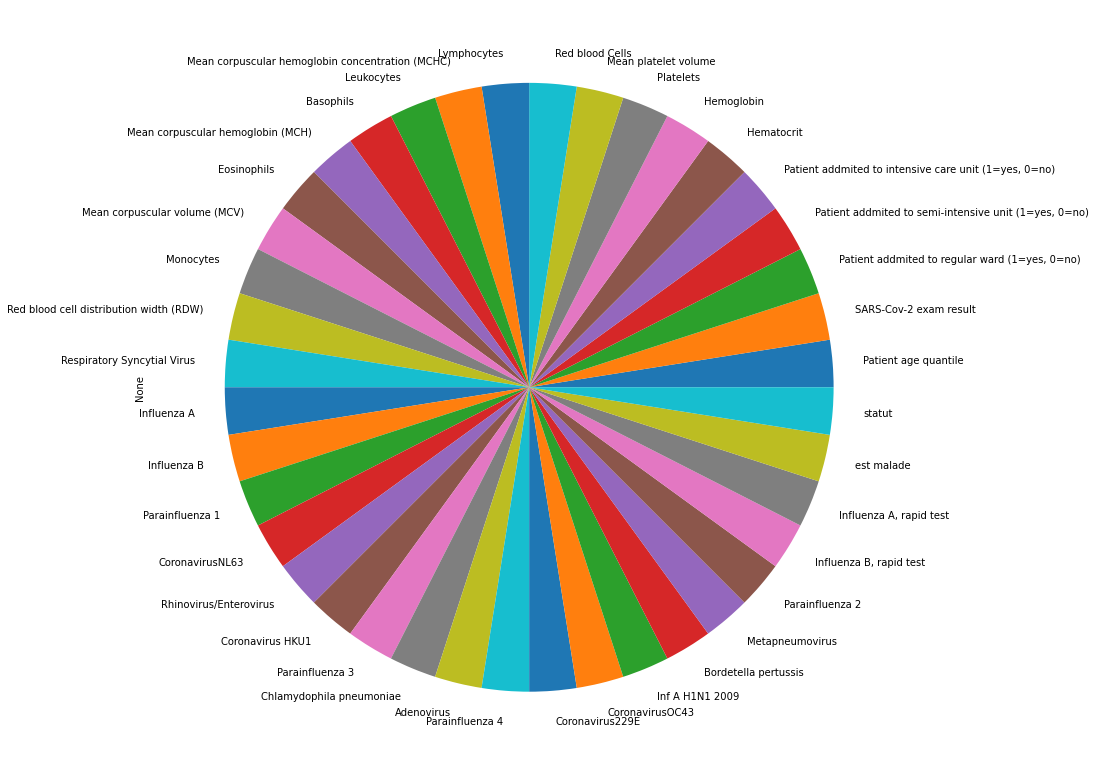

In [144]:
# Voyons voir le nombre de valeurs restantes après élimination des manquantes
plt.figure(figsize=(20, 14))
df.dropna().count().plot.pie()
plt.legend
plt.show()
# Wow, il ne nous reste que 99 valeurs par colonne sur 5644, ce n'est pas cool, on doit les conserver

In [145]:
# Compter le nbre d'occurences de toutes les valeurs après élimination des valeurs manquantes
df.dropna().count()

Patient age quantile                                     99
SARS-Cov-2 exam result                                   99
Patient addmited to regular ward (1=yes, 0=no)           99
Patient addmited to semi-intensive unit (1=yes, 0=no)    99
Patient addmited to intensive care unit (1=yes, 0=no)    99
Hematocrit                                               99
Hemoglobin                                               99
Platelets                                                99
Mean platelet volume                                     99
Red blood Cells                                          99
Lymphocytes                                              99
Mean corpuscular hemoglobin concentration (MCHC)         99
Leukocytes                                               99
Basophils                                                99
Mean corpuscular hemoglobin (MCH)                        99
Eosinophils                                              99
Mean corpuscular volume (MCV)           

In [150]:
# S'il faut travailler avec ces deux types de variables, on doit impérativement conserver les NaN
df[blood_columns].count()

Hematocrit                                          603
Hemoglobin                                          603
Platelets                                           602
Mean platelet volume                                599
Red blood Cells                                     602
Lymphocytes                                         602
Mean corpuscular hemoglobin concentration (MCHC)    602
Leukocytes                                          602
Basophils                                           602
Mean corpuscular hemoglobin (MCH)                   602
Eosinophils                                         602
Mean corpuscular volume (MCV)                       602
Monocytes                                           601
Red blood cell distribution width (RDW)             602
dtype: int64

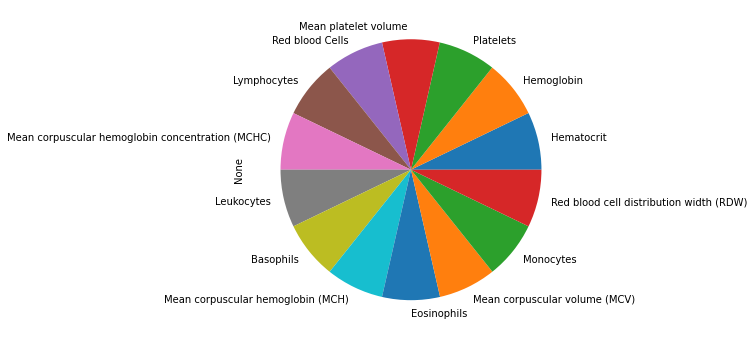

In [153]:
# Afficher les occurences de la varaible "Blood"
plt.figure(figsize=(8, 6))
df[blood_columns].count().plot.pie()
plt.show()

In [154]:
df[viral_columns].count()

Respiratory Syncytial Virus    1354
Influenza A                    1354
Influenza B                    1354
Parainfluenza 1                1352
CoronavirusNL63                1352
Rhinovirus/Enterovirus         1352
Coronavirus HKU1               1352
Parainfluenza 3                1352
Chlamydophila pneumoniae       1352
Adenovirus                     1352
Parainfluenza 4                1352
Coronavirus229E                1352
CoronavirusOC43                1352
Inf A H1N1 2009                1352
Bordetella pertussis           1352
Metapneumovirus                1352
Parainfluenza 2                1352
Influenza B, rapid test         820
Influenza A, rapid test         820
dtype: int64

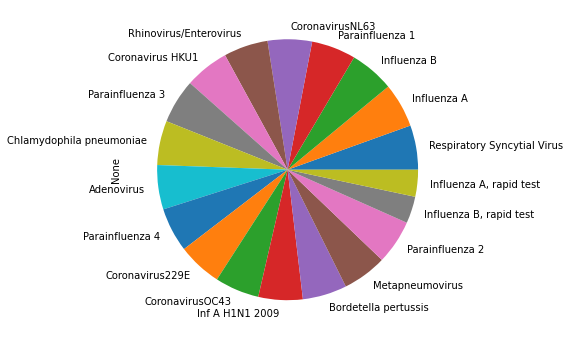

In [155]:
# Afficher les occurences de la varaible "viral"
plt.figure(figsize=(8, 6))
df[viral_columns].count().plot.pie()
plt.show()

In [156]:
# Comprendre l'état de notre target si on élimine toutes les valeurs manquantes de certains groupes
df1 = df[viral_columns[:-2]]
df1["COVID"] = df["SARS-Cov-2 exam result"]
df1.dropna()["COVID"].value_counts(normalize=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2380\1182852236.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["COVID"] = df["SARS-Cov-2 exam result"]


negative    0.91716
positive    0.08284
Name: COVID, dtype: float64

In [157]:
df2 = df[blood_columns[:-2]]
df2["COVID"] = df["SARS-Cov-2 exam result"]
df2.dropna()["COVID"].value_counts(normalize=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2380\2001202283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["COVID"] = df["SARS-Cov-2 exam result"]


negative    0.864775
positive    0.135225
Name: COVID, dtype: float64

## Quelques test d'hypothèses

## T-Test

In [158]:
from scipy.stats import ttest_ind

In [159]:
# Pour effectuer ce test il est mieux d'avoir des classes entre nos différents groupes
positive_df.shape

(558, 38)

In [160]:
negative_df.shape

(5086, 38)

In [161]:
# Utilisation de la technique d'échantillonage en précisant le nomnbre d'échantillons que l'on veut
balanced_ned = negative_df.sample(positive_df.shape[0])

In [162]:
# Définition de la fonction t_test
def t_test(col):
    
    # Un pourcentage (seuil) de 2%
    alpha = 0.02
    stat, p = ttest_ind(balanced_ned[col].dropna(), positive_df[col].dropna())
    if p < alpha:
        return "H0 Rejetée"
    else:
        return 0
    

In [163]:
for col in blood_columns:
    
    print(f"{col :-<55} {t_test(col)}")

Hematocrit--------------------------------------------- H0 Rejetée
Hemoglobin--------------------------------------------- H0 Rejetée
Platelets---------------------------------------------- H0 Rejetée
Mean platelet volume ---------------------------------- H0 Rejetée
Red blood Cells---------------------------------------- H0 Rejetée
Lymphocytes-------------------------------------------- 0
Mean corpuscular hemoglobin concentration (MCHC)------- 0
Leukocytes--------------------------------------------- H0 Rejetée
Basophils---------------------------------------------- 0
Mean corpuscular hemoglobin (MCH)---------------------- 0
Eosinophils-------------------------------------------- H0 Rejetée
Mean corpuscular volume (MCV)-------------------------- 0
Monocytes---------------------------------------------- H0 Rejetée
Red blood cell distribution width (RDW)---------------- 0


# PRE-PROCESSING (Pré-Traitement de données)
***C'est une étape qui consiste à préparer les données avant de les fournir à la machine pour son apprentissage***


### Obejectifs : 
#### 1. Mettre les données dans un format propice et adapté au développement de modèle de Machine Learning (ML)
- **Train / Test**
- **Encodage**
- **Nettoyage des NaN**
   
##### Création du premier modèle : Evaluation - Diagnostique

#### 2. Améliorer la performance du modèle en ayant le Dataset le plus propre possible
- **Feature Selection** 
- **Feature Engineering**
- **Feature Scaling**
- **Suppression des Outliers**

In [165]:
# Encore une copie pour le pré-traitement
# La copie fait à ce que l'on conserve le Data set d'origine sans y toucher
df = data.copy()

# Visualation des premières lignes du Dataset
df.head(10)

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   
5  75f16746216c4d1                     9               negative   
6  2a2245e360808d7                    13               negative   
7  509197ec73f1400                    16               negative   
8  8bb9d64f0215244                     1               negative   
9  5f1ed301375586c                    17               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   
5                                               0   
6                                               0   
7                                               0   
8                                               0   
9                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       
5                                                  0       
6                                                  0       
7                                                  0       
8                                                  1       
9                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   
5                                                  0             NaN   
6                                                  0             NaN   
7                                                  0             NaN   
8                                                  0       -1.571682   
9                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1   -0.022340  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   
5         NaN        NaN                    NaN              NaN          NaN   
6         NaN        NaN                    NaN              NaN          NaN   
7         NaN        NaN                    NaN              NaN          NaN   
8   -0.774212   1.429667              -1.672222        -0.850035    -0.005738   
9         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                         -0.950790    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                           

### Création des sous ensembles (suite au Explory Data Analysis)

In [166]:
# Définir les données manquantes
missing_rate = df.isna().sum()/df.shape[0]

In [170]:
# Affichage de ces données
missing_rate

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Hematocrit                                               0.893161
Hemoglobin                                               0.893161
Platelets                                                0.893338
Mean platelet volume                                     0.893870
Red blood Cells                                          0.893338
Lymphocytes                                              0.893338
Mean corpuscular hemoglobin concentration (MCHC)         0.893338
Leukocytes                                               0.893338
Basophils                                                0.893338
Mean corpu

In [171]:
# les données du taux sanguin
blood_columns = list(df.columns[(missing_rate < 0.9) & (missing_rate > 0.88)])
# les données du taux de viral
viral_columns = list(df.columns[(missing_rate < 0.80) & (missing_rate > 0.75)])

In [172]:
# les colonnes clées
keys_columns = ["Patient age quantile", "SARS-Cov-2 exam result"]

In [173]:
# Filtrage du Data Frame
df = df[keys_columns + blood_columns + viral_columns]
df.head(10)

Patient age quantile SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
0                    13               negative         NaN         NaN   
1                    17               negative    0.236515   -0.022340   
2                     8               negative         NaN         NaN   
3                     5               negative         NaN         NaN   
4                    15               negative         NaN         NaN   
5                     9               negative         NaN         NaN   
6                    13               negative         NaN         NaN   
7                    16               negative         NaN         NaN   
8                     1               negative   -1.571682   -0.774212   
9                    17               negative         NaN         NaN   

   Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0        NaN                    NaN              NaN          NaN   
1  -0.517413               0.010677         0.102004     0.318366   
2        NaN                    NaN              NaN          NaN   
3        NaN                    NaN              NaN          NaN   
4        NaN                    NaN              NaN          NaN   
5        NaN                    NaN              NaN          NaN   
6        NaN                    NaN              NaN          NaN   
7        NaN                    NaN              NaN          NaN   
8   1.429667              -1.672222        -0.850035    -0.005738   
9        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                         -0.950790    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   
5                                               NaN         NaN        NaN   
6                                               NaN         NaN        NaN   
7                                               NaN         NaN        NaN   
8                                          3.331071     0.36455  -0.223767   
9                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   
5                                NaN          NaN   
6                                NaN          NaN   
7                                NaN          NaN   
8                           0.178175     1.018625   
9                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   
5                            NaN        NaN   
6                            NaN        NaN   
7                            NaN        NaN   
8                      -1.336024   0.068652   
9                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   
5                      

## TrainTest - Nettoyage - Encodage

## TrainTest

In [174]:
# Importation de la fonction de test
from sklearn.model_selection import train_test_split

In [175]:
trainset, testset = train_test_split(df, test_size=0.25, random_state=0)

In [178]:
# Vérification des valeurs de trainset
trainset["SARS-Cov-2 exam result"].value_counts()

negative    3806
positive     427
Name: SARS-Cov-2 exam result, dtype: int64

In [179]:
# Vérification des valeurs de testset mais il est bien sûr mis de côté sans y toucher
testset["SARS-Cov-2 exam result"].value_counts()

negative    1280
positive     131
Name: SARS-Cov-2 exam result, dtype: int64

## Nettoyage

In [180]:
# Définir la fonction Encodage
def encodage(df):
    
    # Mettre toutes les valeurs catégorielles en entier
    code = {"positive": 1,
        "negative": 0,
        "detected": 1,
        "not_detected": 0}

    # Appliquer le dictionnaire à toutes les colonnes de types object
    for col in df.select_dtypes("object"):
        df.loc[:, col] = df[col].map(code)
    
    return df

In [181]:
# Créer des variables à partir de celles déjà existentes
def feature_engineering(df):
    
    df["est malade"] = df[viral_columns].sum(axis=1) >= 1
    # Eliminer toutes les variables virales sauf est malade
    df = df.drop(viral_columns, axis=1)
    return df

In [182]:
# Définfition de la fonction capable d'éliminer les values manquantes
def imputation(df):
    
    #df["is na"] = (df["Parainfluenza 3"].isna()) | (df["Leukocytes"].isna())
    # Remplir les valeurs manquantes avec une valeur extrème
    #df = df.fillna(-999)
    df = df.dropna(axis=0)
    return df

In [183]:
# La fonction effectuant le pré-traitement
def preprocessing(df):
    
    df = encodage(df)
    df = feature_engineering(df)
    df = imputation(df)
    
    # Définir X_train et y_test pour faire le Machine Learning
    X = df.drop("SARS-Cov-2 exam result", axis=1)
    y = df["SARS-Cov-2 exam result"]
    
    # Afficher les données de la target
    print(y.value_counts())
    
    # On retourne le train et le test
    return X, y

In [184]:
X_train, y_train = preprocessing(trainset)

0    401
1     61
Name: SARS-Cov-2 exam result, dtype: int64


In [185]:
X_test, y_test = preprocessing(testset)

0    116
1     20
Name: SARS-Cov-2 exam result, dtype: int64


## Modélisation 
##### Création d'un modèle : l'arbre de décision
##### Le choix se porte sur ce modèle car, il est très rapide et facile à comprendre

In [186]:
# Importations suplémentaires
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# Un algo de SVM très éfficace poour les données de 1000 à 10.000
from sklearn.svm import SVC
# Un algo de base KNN
from sklearn.neighbors import KNeighborsClassifier
# Création une pipeline pour faire de la sélection key best
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
# Expansion polynomiale
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
#from sklearn.decomposition import PCA

### Amélioration du modèle

In [187]:
# Création du modèle proprement dit et fixer le générateur aléatoire à 0
# Ceci dans le but d'avoir une repétabilité 
# Transformer le modèle en celuie pipeline avec les différentes opérations de transformation
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))

In [188]:
# Nouvelles pipelines
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
# Ajoutd'une opération de normalisation 
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

In [189]:
# Amélioration de la performance de base du modèle

# Création d'une liste de plusieurs modèles de ML différents
dict_models = {"RandomForest": RandomForest, 
               "AdaBoost": AdaBoost, 
               "SVM": SVM, 
               "KNN": KNN
              }

## Procédure d'évaluation

In [190]:
# On choisis le f_score pour avoir une bonne précision
from sklearn.metrics import f1_score, confusion_matrix, classification_report

# Pour voir si quel type de déviation on a on utilise le curve
from sklearn.model_selection import learning_curve

In [191]:
# Définition d'une fonction d'évaluation
def evaluation(model):
    
    # On entraine le modèle
    model.fit(X_train, y_train)
    # Calcul des prédictions sur le modèle
    ypred = model.predict(X_test)
    
    # Affichage de la matrix de confusion sur les données suivantes :
    print(confusion_matrix(y_test, ypred))
    # Affichage du rapport de classification
    print(classification_report(y_test, ypred))
    
    # Ajout de learning_curve() qui utilise la validation croisée (cross validation)
    # pour entrainer et évaluer le modèle
    # cv(cross validation)
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring="f1",
                                              train_sizes=np.linspace(0.1, 1, 10))
    
    # On affiche tout cela dans un graphique
    
    # Création de la figure contenant le tout
    plt.figure(figsize=(10, 6))
    # Afficher l'évolution de train_score en prennant la moyenne
    # en fonction de N(le nombre de gens qui ont servi pour ce train)
    plt.plot(N, train_score.mean(axis=1), label="train score")
    plt.plot(N, val_score.mean(axis=1), label="validation score")
    # Afficher la légende de la figure
    plt.legend()
    

RandomForest
[[111   5]
 [ 11   9]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       116
           1       0.64      0.45      0.53        20

    accuracy                           0.88       136
   macro avg       0.78      0.70      0.73       136
weighted avg       0.87      0.88      0.87       136

AdaBoost
[[111   5]
 [ 13   7]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       116
           1       0.58      0.35      0.44        20

    accuracy                           0.87       136
   macro avg       0.74      0.65      0.68       136
weighted avg       0.85      0.87      0.85       136

SVM
[[114   2]
 [ 12   8]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       116
           1       0.80      0.40      0.53        20

    accuracy                           0.90       136
   macro avg       0.85      0.69

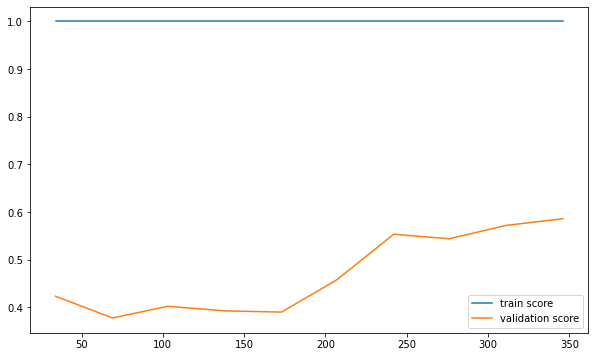

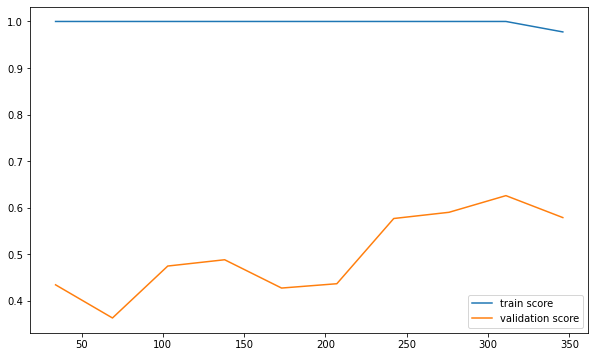

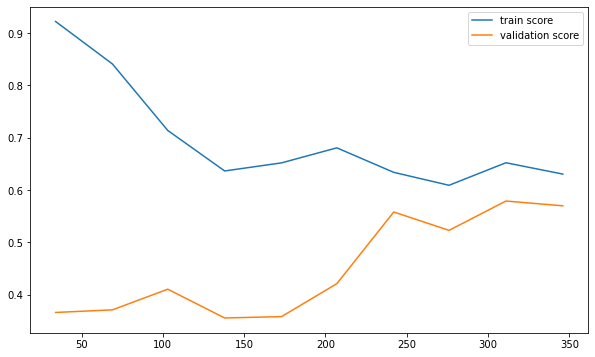

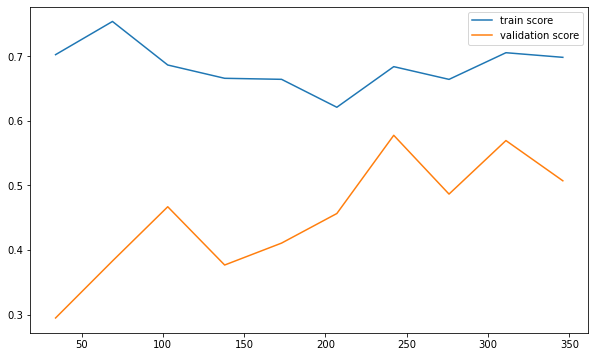

In [192]:
# Evaluation des modèles
for name, model in dict_models.items():
    
    # Afficher les noms
    print(name)
    evaluation(model)

# Optimaisation de modèles

In [193]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [194]:
# Avec GridSearchCV il est impératif d'utilliser un dict d'hyper paramètres
AdaBoost

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest())])),
                ('adaboostclassifier', AdaBoostClassifier(random_state=0))])

In [195]:
"""hyper_params = {"svc__gama": [1e-3, 1e-4], 
                "svc__C":[1, 10, 100, 1000]
               }"""

hyper_params = {'svc__gamma':[1e-3, 1e-4, 0.0005],
                'svc__C':[1, 10, 100, 1000, 3000], 
               'pipeline__polynomialfeatures__degree':[2, 3],
               'pipeline__selectkbest__k': range(45, 60)}

In [196]:
# Faire passer le dict hyper_params dans le GridSearchCV
# Avec GridSearchCV c'est n_jobs qu'il faut utilise à la place de n_iter
grid = RandomizedSearchCV(SVM, hyper_params, scoring="recall", cv=4, n_iter=40)

# Entrainer le grid
grid.fit(X_train, y_train)

# Afficher les meilleurs hyper_params
print(grid.best_params_)

# Calcul du vector prédiction
y_pred = grid.predict(X_test)

# Comparer le résultat avec les valeurs attendues
print(classification_report(y_test, y_pred))

{'svc__gamma': 0.0005, 'svc__C': 1000, 'pipeline__selectkbest__k': 46, 'pipeline__polynomialfeatures__degree': 3}
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       116
           1       0.62      0.40      0.48        20

    accuracy                           0.88       136
   macro avg       0.76      0.68      0.71       136
weighted avg       0.86      0.88      0.86       136



[[111   5]
 [ 12   8]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       116
           1       0.62      0.40      0.48        20

    accuracy                           0.88       136
   macro avg       0.76      0.68      0.71       136
weighted avg       0.86      0.88      0.86       136



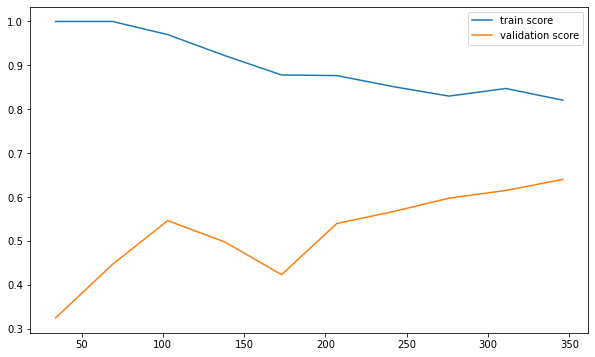

In [197]:
evaluation(grid.best_estimator_)

### Precision Recall Curve

In [198]:
# Vérification  de la future sensibilité (précision) en fonction de prédiction
from sklearn.metrics import precision_recall_curve

In [199]:
precision, recall, threshold = precision_recall_curve(y_test, 
                                                      grid.best_estimator_.decision_function(X_test))

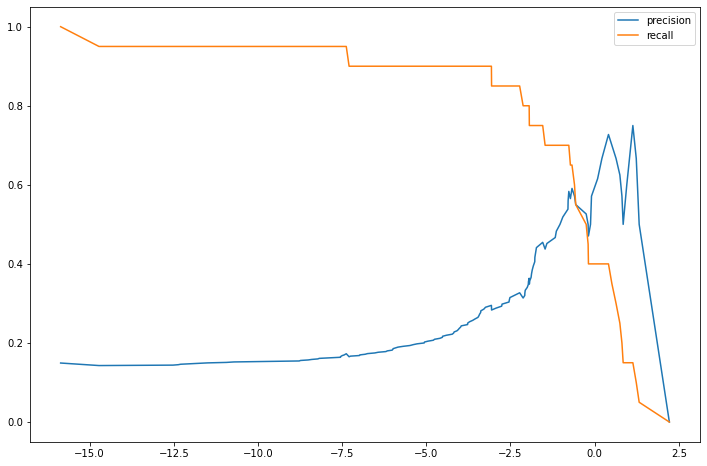

In [200]:
# Création de la figure
plt.figure(figsize=(12, 8))
# Prendre la précision et le recall jusqu'à l'avant dernier élément
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()
plt.show()

In [206]:
# Le dernier modèle de prédiction
# le modèle final pour toutes les prédictions
def model_final(model, X, threshold=0):
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
    return model.decision_function(X) > threshold

In [202]:
y_pred = model_final(grid.best_estimator_, X_test, threshold=-1)

In [203]:
from sklearn.metrics import recall_score

In [204]:
# Le score final de toutes les prédictions du modèle final qui nous donne les détails nécessaires
# Pour la prédiction finale
f1_score(y_test, y_pred)

0.5957446808510639

In [205]:
recall_score(y_test, y_pred)

0.7